# Frame the Problem
Doxorubicin (DOX), an antibiotic and chemotherupic drug has been used to treat human cancers. Unfortunately DOX also has a major drawback causing cardiotoxicity. Through the use of Poly Lactic-co-Glycolic Acid (PLGA), a polymer made up of lactic acid and glycolic acid, is used as a biodegradable and biocompatible carrier to control the release of DOX at different pH levels in order to reduce DOX's cardiotoxicity. Using machine learning to find patterns within the data provided by the Tuffs Medical Center in order to better understand which of the 17 documented features show more insight in studying the advantages of using PLGA as a nanoparticle carrier on a molecular level.

# Looking at the Data
The data we are working with is sourced from Tuffs Medical Center study with Jaehyun Lee, Chunhui Li, Asma Boukhalfa, and Howard H. Chen across 3 main treatments in a mice experiment. We were able to receive a large dataset of 440,000 entries per class (Untreated, DOX, PLGA+DOX). Using machine learning algorithms we are able to identify patterns and correlations within the data that can help treat this disease. Our approach will involve the classification of this data.

###Reading in the data
After loading the data through drive, the first row is dropped because it is just metadata and to ensure that the index starts from 0 again. This is repeated or each of the 3 classes. Then using 3 for loops, we change the column variables from each of the classes from object types to numeric types so that we can perform further graphical and numerical analysis on the variables.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import csv

#read the excel files into dataframes
doxData = pd.read_excel("/content/drive/MyDrive/Research/Summer 2024/Projects/PLGA/Raw_Data_from_Howard/data_dox.xlsx")
doxPlgaData = pd.read_excel("/content/drive/MyDrive/Research/Summer 2024/Projects/PLGA/Raw_Data_from_Howard/data_dox_plga.xlsx")
untreatedData = pd.read_excel("/content/drive/MyDrive/Research/Summer 2024/Projects/PLGA/Raw_Data_from_Howard/data_untreated.xlsx")

#drop the first row from each- as it is just metadata
doxData = doxData.drop(index=0)
doxData.reset_index(drop=True, inplace=True)#reset the index to ensure it starts from 0 again

doxPlgaData = doxPlgaData.drop(index=0)
doxPlgaData.reset_index(drop=True, inplace=True)

untreatedData = untreatedData.drop(index=0)
untreatedData.reset_index(drop=True, inplace=True)

#drop the first 3 columns
doxData.drop(columns=["Instance", "Sample","Cell"], inplace=True)  # Drop column 'B'
doxPlgaData.drop(columns=["Instance", "Sample","Cell"], inplace=True)  # Drop column 'B'
untreatedData.drop(columns=["Instance", "Sample","Cell"], inplace=True)  # Drop column 'B'

#change the columns from objects to numeric
for column in doxData:
  doxData[column] = pd.to_numeric(doxData[column])
for column in doxPlgaData:
  doxPlgaData[column] = pd.to_numeric(doxPlgaData[column])
for column in untreatedData:
  untreatedData[column] = pd.to_numeric(untreatedData[column])


Mounted at /content/drive


###Statistical analysis of the data

In [ ]:
doxData.describe()

,FSC-A,SSC-A,SSC-H,SSC-W,FITC-B-525/50-A,PI-B-630/40-A,PerPCy55-B-695/40-A,PacBlue-V-450/50-A,BV605-610/20-A,BV711-V-760/50-A,BUV395-A,BUV563-A,APC-R-670/14-A,APC-Cy7-R-780/60-A,PE-YG-585/15-A,PE CY5-YG-680/42-A,PE-Cy7-YG-780/60-A
count,440000.000000,440000.000000,440000.000000,440000.000000,440000.000000,440000.000000,440000.000000,440000.000000,440000.000000,440000.000000,440000.000000,440000.000000,440000.000000,440000.000000,440000.00000,440000.000000,440000.000000
mean,48471.459199,112330.821841,60199.673484,115929.748717,540.888805,1620.618514,61746.611098,225.384003,9335.388788,4401.942286,3905.992441,2150.553497,1692.398006,7152.770490,37847.64139,24588.453588,5209.578951
std,33510.826553,59568.869594,28179.523672,27068.465058,413.425572,1226.547355,45688.728193,690.593513,8423.975201,4157.540162,3866.632979,1824.108303,2853.542060,13013.413215,26889.15653,18366.542093,6007.824873
min,-4437.600000,-1054.000000,42.000000,0.000000,-62.000000,-219.000000,-738.000000,-359.480000,-496.220000,-1190.240000,-2046.610000,-146.260000,-188.000000,-233.120000,-890.33000,-1065.710100,-197.500000
25%,19375.201000,78885.750000,45437.750000,101540.703000,311.000000,843.000000,29675.750000,55.900000,3628.340000,2075.180000,1211.022425,756.019960,242.520000,278.240000,21182.86275,13002.610000,1836.750000
50%,44582.402000,116853.500000,64114.000000,115703.950000,525.000000,1575.000000,57725.000000,129.000000,6794.860400,3474.400100,3301.150000,1920.950000,551.779970,1375.220000,37108.67000,22938.835500,3301.410200
75%,69005.600000,149303.250000,78353.000000,130198.301250,714.000000,2189.000000,84368.000000,251.980010,14035.200000,5665.680000,5684.570000,3162.099900,1940.160000,8424.280000,50682.45300,32984.082000,6633.037825
max,262143.000000,262143.000000,256828.000000,262143.000000,80588.000000,51676.000000,262143.000000,262143.000000,262143.000000,262143.000000,262143.000000,228069.800000,184983.550000,262143.000000,262143.00000,262143.000000,262143.000000


In the DOX dataframe, the average value of the all the fluorecent readings is 48471 and the standard deviation is larger than what is expected with a value that is almost the same as the average itself. This means and indicates that more than 5% of the data is within the first STD from the mean which is not normal. This indicates there is a large amount of outliers that exists within the data. Later on we plan to take action to remove those outliers.

In [ ]:
doxPlgaData.describe()

,FSC-A,SSC-A,SSC-H,SSC-W,FITC-B-525/50-A,PI-B-630/40-A,PerPCy55-B-695/40-A,PacBlue-V-450/50-A,BV605-610/20-A,BV711-V-760/50-A,BUV395-A,BUV563-A,APC-R-670/14-A,APC-Cy7-R-780/60-A,PE-YG-585/15-A,PE CY5-YG-680/42-A,PE-Cy7-YG-780/60-A
count,440000.000000,440000.000000,440000.000000,440000.000000,440000.000000,440000.000000,440000.000000,440000.000000,440000.00000,440000.000000,440000.000000,440000.000000,440000.000000,440000.000000,440000.000000,440000.000000,440000.000000
mean,32003.466540,65470.330543,37667.783757,97910.026886,354.791195,887.841459,30770.369359,141.262717,2986.74524,2037.164607,3076.502963,917.801246,1066.923186,3658.784206,20236.936368,10961.606070,2381.993033
std,32553.420904,63944.769129,33128.909308,29331.237004,477.083440,1090.851864,37240.512647,691.133779,4254.81222,3292.264410,5496.566966,1176.334156,4514.453164,10955.011740,23996.862939,14413.575162,5211.157894
min,4304.800300,-620.000000,31.000000,0.000000,-65.000000,-79.000000,-452.000000,-397.320000,-243.38000,-1306.340000,-1168.020000,-124.630000,-111.860000,-138.180000,-1128.120000,-1079.930000,-193.550000
25%,8728.000000,9970.000000,8744.750000,73433.907500,52.000000,99.000000,3417.000000,-2.580000,436.02002,300.140000,397.580000,105.060000,55.460000,54.520000,2088.760000,1233.190100,194.340010
50%,16036.000000,39773.000000,27168.000000,92617.425000,178.000000,417.000000,13879.000000,88.580000,1545.42000,1154.980000,1440.970000,437.750000,244.400000,303.620000,8964.525000,4999.120000,936.150000
75%,48587.200000,111876.250000,62023.250000,116671.647500,550.000000,1452.000000,49606.000000,192.640000,4702.48000,2807.900100,4820.400000,1429.640000,674.920000,2028.520000,34306.540000,17635.960000,2613.320000
max,262143.000000,262143.000000,256843.000000,262143.000000,34974.000000,37562.000000,262143.000000,262143.000000,262143.00000,262143.000000,262143.000000,79815.730000,262143.000000,262143.000000,262143.000000,262143.000000,262143.000000


Similar findings to the DOX dataframe, the DOX+PLGA dataframe has almost equal mean and standard deviation in most of the variables in the dataset. The max value and 75% of the data is significantly far away from each other which further indicate a large amount of outliers that need to be delt with. There are also some negative values in the dataset. We concluded that it is not abnormal because that would just mean the intensity of the fluorescent vibrations along the direction of propagation of the incident light is greater than that of vibrations in the perpendicular direction.

In [ ]:
untreatedData.describe()

,FSC-A,SSC-A,SSC-H,SSC-W,FITC-B-525/50-A,PI-B-630/40-A,PerPCy55-B-695/40-A,PacBlue-V-450/50-A,BV605-610/20-A,BV711-V-760/50-A,BUV395-A,BUV563-A,APC-R-670/14-A,APC-Cy7-R-780/60-A,PE-YG-585/15-A,PE CY5-YG-680/42-A,PE-Cy7-YG-780/60-A
count,440000.000000,440000.000000,440000.000000,440000.000000,440000.000000,440000.000000,440000.000000,440000.000000,440000.000000,440000.000000,440000.000000,440000.000000,440000.000000,440000.000000,440000.000000,440000.000000,440000.000000
mean,85834.638625,77695.307509,44640.591148,110192.304660,68.377184,20.800798,1696.755859,272.126543,1736.819322,2825.457116,4355.803261,344.924434,2648.505064,13369.728136,1892.352434,6780.480689,5304.252361
std,42585.705987,40729.957548,20019.213774,20432.406025,74.507402,41.834006,1600.956141,1132.464208,2699.603173,2613.000521,4148.998296,392.386887,2934.402158,14732.821564,1915.172318,6186.129443,5165.794790
min,-10378.400000,-155.000000,50.000000,0.000000,-68.000000,-364.000000,-170.000000,-387.860020,-283.800020,-1191.100000,-1020.730000,-125.659996,-141.000000,-438.980000,-817.650000,-1261.630000,-207.770000
25%,62412.600000,56026.000000,34556.000000,100590.907500,37.000000,1.000000,792.000000,81.700005,553.840000,1007.920040,2347.369900,159.650000,783.960000,3243.940000,1124.960100,2543.010000,1579.210100
50%,85914.400000,72958.000000,43562.000000,108143.840000,61.000000,19.000000,1432.000000,134.160000,1255.600000,2426.920000,3566.890000,291.490000,1803.860000,8963.840000,1645.570100,5660.350000,4292.070300
75%,109507.200000,95602.000000,54652.000000,117229.826250,89.000000,38.000000,2233.000000,204.680010,2207.620000,3971.480000,5391.020000,458.349980,3655.660000,18766.395000,2316.280000,9299.090000,7477.547500
max,262143.000000,262143.000000,256834.000000,262143.000000,18684.000000,12748.000000,157189.000000,218721.220000,262143.000000,262143.000000,262143.000000,105862.370000,262143.000000,262143.000000,262143.000000,262143.000000,262143.000000


The untreated dataframe has a large value of outliers as shown my their minimum value. The max value is closer to Q3 compared to the other datasets but still quite a large value. The standard deviation is large but still smaller compared to mean but still indicates a relatively spread out distribution. Which further indicates the existance of outliers. But less than the previous two dataframes.

# Outliers
First we determined how many outliers that we could potential remove using a function and then debate whether they should be removed. This is done by calculuating the outliers using IQR, Q3, and Q1.

Initially, we chose to use IQR * 1.5 as the distance away from 25% and 75% of the data, but it removed almost half of the total amount of data which we decided was not representative of the entire dataset. (FSC-A)DOX had 4893, PLGA had 10207, and untreated had 14772 outliers.

Finally, we chose to use IQR * 3 as the distance away from 25% and 75% of the data as it removes a smaller amount of outliers without making the distribution of the data portrayed in a histogram look clustered with small values unnoticable by the graph make the graph look extremely unreadable and spread out. This decreases the number of outliers to:(FSC-A)<br>
DOX: 426<br>
PLGA+DOX: 1676<br>
untreated: 1140

In [ ]:
#function to find outliers
def find_outliers_IQR(df):
    outliers = pd.DataFrame() #instantiate new df

    for col in df.columns:
      Q1 = df[col].quantile(0.25) #set q1 and q3
      Q3 = df[col].quantile(0.75)
      IQR = Q3 - Q1 #calculate the IQR
      lower_bound = Q1 - 3 * IQR #calculate lower bound
      upper_bound = Q3 + 3 * IQR #calculate upper bound
      outliers_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)] #create a new column for the new df using only records in right range
      outliers = pd.concat([outliers, outliers_col]) #add this new column to the outliers df

    outliers = outliers.drop_duplicates()
    return outliers

In [ ]:
doxOutliers = find_outliers_IQR(doxData)
doxOutliers.info()

In [ ]:
plgaDoxOutliers = find_outliers_IQR(untreatedData)
plgaDoxOutliers.info()

In [ ]:
untOutliers = find_outliers_IQR(doxPlgaData)
untOutliers.info()

####Getting rid of the outliers
Next we decided to get rid of the outliers that are IQR * 3 away from 75% of the data and the extremely low values that are less than 25% of the data.

In [ ]:
#function to get rid of outliers
def removeOutliers(df, columns=None):
  if columns is None:
      columns = df.columns
  for col in columns:
      if pd.api.types.is_numeric_dtype(df[col]):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
  return df

We labeled the dataframe versions without outliers with new variable names

In [ ]:
doxClean=removeOutliers(doxData) #call remove outliers function and delete them
doxPlgaClean=removeOutliers(doxPlgaData)
untreatedDataClean=removeOutliers(untreatedData)

In [ ]:
doxPlgaClean.describe()

,FSC-A,SSC-A,SSC-H,SSC-W,FITC-B-525/50-A,PI-B-630/40-A,PerPCy55-B-695/40-A,PacBlue-V-450/50-A,BV605-610/20-A,BV711-V-760/50-A,BUV395-A,BUV563-A,APC-R-670/14-A,APC-Cy7-R-780/60-A,PE-YG-585/15-A,PE CY5-YG-680/42-A,PE-Cy7-YG-780/60-A
count,338700.000000,338700.000000,338700.000000,338700.000000,338700.000000,338700.000000,338700.000000,338700.000000,338700.000000,338700.000000,338700.000000,338700.000000,338700.000000,338700.000000,338700.000000,338700.000000,338700.000000
mean,25974.653880,50279.492448,30101.325037,91770.469285,267.556425,699.737340,22797.870714,76.533993,2174.764543,1105.353050,2122.340987,704.030601,210.874540,445.660521,15724.726483,7327.244970,909.650567
std,26282.604959,54438.533255,28276.708127,26001.062480,318.074433,843.281406,27406.525839,159.034928,2451.381750,1341.041808,2641.545498,880.101597,229.077955,686.292972,19401.029030,9094.472196,1035.929094
min,4304.800300,-620.000000,31.000000,0.000000,-65.000000,-79.000000,-452.000000,-397.320000,-243.380000,-1306.340000,-1168.020000,-124.630000,-111.860000,-138.180000,-1128.120000,-1079.930000,-193.550000
25%,7980.000000,7506.000000,6805.000000,71026.158000,41.000000,77.000000,2545.000000,-23.220001,338.840000,100.620000,268.830000,81.369995,35.720000,30.785000,1604.490000,901.390000,135.090000
50%,12789.601000,21859.000000,17241.000000,83556.907000,113.000000,285.000000,9152.000000,63.640000,925.360000,787.760000,860.050000,279.130000,136.300000,145.700000,5443.100000,2595.150100,442.400020
75%,36719.200000,89917.000000,52340.000000,109710.846000,438.000000,1177.000000,38189.000000,151.360000,3728.960000,1852.440100,3588.520000,1091.799900,327.120000,539.560000,27132.550000,12285.487500,1464.660000
max,168097.610000,262143.000000,220878.000000,245795.860000,2028.000000,5395.000000,175667.000000,766.260000,15879.040000,8063.360400,16340.949000,4848.210000,2130.040000,3336.060000,104513.840000,46730.082000,5454.950000


After cleaning the data after getting rid of the outliers, there is a lower maximum value and 75% of the data which indicates how less spread out the data is compared to before.

In [ ]:
untreatedDataClean.describe()

,FSC-A,SSC-A,SSC-H,SSC-W,FITC-B-525/50-A,PI-B-630/40-A,PerPCy55-B-695/40-A,PacBlue-V-450/50-A,BV605-610/20-A,BV711-V-760/50-A,BUV395-A,BUV563-A,APC-R-670/14-A,APC-Cy7-R-780/60-A,PE-YG-585/15-A,PE CY5-YG-680/42-A,PE-Cy7-YG-780/60-A
count,388561.000000,388561.000000,388561.000000,388561.000000,388561.000000,388561.000000,388561.000000,388561.000000,388561.000000,388561.000000,388561.000000,388561.000000,388561.000000,388561.000000,388561.000000,388561.000000,388561.000000
mean,84222.760894,71396.928485,42463.404096,107070.651609,59.508064,17.820054,1496.135698,127.758602,1383.267198,2525.317412,3844.413470,308.140338,2291.147636,11702.855987,1638.706696,5956.820070,4699.997004
std,35803.561614,31641.257474,17106.969170,15119.278980,37.336005,26.131790,1004.708069,93.776033,1076.309169,1915.940202,2415.515868,207.807721,2071.424945,11230.426342,886.374866,4445.954645,3857.462880
min,4124.800300,108.000000,127.000000,51561.750000,-68.000000,-103.000000,-170.000000,-264.880000,-283.800020,-1191.100000,-1020.730000,-120.509995,-98.700000,-125.960000,-817.650000,-1261.630000,-207.770000
25%,65056.000000,54975.000000,34181.000000,99993.650000,35.000000,0.000000,757.000000,75.680000,519.440000,941.700000,2311.319800,154.500000,730.380000,2994.840000,1090.200100,2366.050000,1451.230000
50%,85867.200000,70420.000000,42627.000000,107049.040000,58.000000,17.000000,1358.000000,122.980000,1142.940100,2297.920000,3428.869900,279.130000,1676.020000,8374.460000,1569.730100,5326.180000,4040.850000
75%,106752.805000,89528.000000,52485.000000,114972.330000,82.000000,35.000000,2077.000000,177.160000,2050.240000,3722.080000,4991.380000,431.569980,3304.100000,17095.780000,2134.580000,8609.420000,6963.060000
max,250781.610000,213085.000000,112823.000000,165728.900000,236.000000,144.000000,6302.000000,540.080000,6733.800300,12192.220000,13437.380000,1276.169900,11217.960000,59744.520000,5281.940000,27305.560000,23423.500000


After cleaning the data after getting rid of the outliers, many of the extremely negative values are deleted.

In [ ]:
doxClean.describe()

,FSC-A,SSC-A,SSC-H,SSC-W,FITC-B-525/50-A,PI-B-630/40-A,PerPCy55-B-695/40-A,PacBlue-V-450/50-A,BV605-610/20-A,BV711-V-760/50-A,BUV395-A,BUV563-A,APC-R-670/14-A,APC-Cy7-R-780/60-A,PE-YG-585/15-A,PE CY5-YG-680/42-A,PE-Cy7-YG-780/60-A
count,362504.000000,362504.000000,362504.000000,362504.000000,362504.000000,362504.000000,362504.000000,362504.000000,362504.000000,362504.000000,362504.000000,362504.000000,362504.000000,362504.000000,362504.000000,362504.000000,362504.000000
mean,45339.391704,103821.915355,56859.844967,112379.993175,484.912561,1472.903328,53400.692580,142.075679,7998.426241,3237.248651,3230.969705,1892.083411,793.646295,2944.921577,34454.108924,20767.604454,3358.345173
std,29817.861402,56846.409673,27512.227391,25305.077946,313.744676,999.732196,36662.412942,175.449736,6868.784847,2202.490813,2699.725213,1501.672486,920.662769,4345.011915,22885.748907,13716.995444,2590.742363
min,4496.800300,46.000000,103.000000,19357.610000,-58.000000,-168.000000,-359.000000,-359.480000,-358.620000,-1190.240000,-2046.610000,-146.260000,-106.220000,-223.720000,-890.330000,-1065.710100,-197.500000
25%,17320.000000,67509.250000,40459.750000,98200.817500,256.000000,696.000000,23946.000000,43.000000,3144.160200,1750.960100,977.470000,622.120000,205.860000,203.980000,17276.312500,10458.811000,1569.730100
50%,43818.001000,111381.000000,62311.000000,113448.615000,494.000000,1491.000000,53235.000000,108.360000,5624.400000,3041.820000,2683.150000,1654.179900,419.240000,809.340000,35140.780000,20611.890000,2795.020000
75%,66063.200000,142320.000000,76045.000000,127277.362500,670.000000,2087.000000,76595.000000,193.500000,12528.480000,4444.480000,4953.270000,2910.780000,991.700000,3768.695000,48329.832000,29282.140000,4561.460000
max,214299.200000,262143.000000,176692.000000,216057.400000,1918.000000,6154.000000,243239.000000,811.840000,44001.902000,15009.580000,18038.389000,10094.000000,5394.660000,18701.300000,141519.030000,85829.555000,13615.650000


After removing the outliers, the standard deviation is less than before which indicates a less spread out distribution.

#Finding correlation

Finding correlation between features for all 3 sets and comparing these relationships between classes

Correlation in the dox dataset. Comparing how correlated that the variables are with one another in order to determine which variables are dependent on the other variables.

In [ ]:
#correlation matrix of the dox only treated cells
doxCorr = doxClean.corr()
doxCorr

,FSC-A,SSC-A,SSC-H,SSC-W,FITC-B-525/50-A,PI-B-630/40-A,PerPCy55-B-695/40-A,PacBlue-V-450/50-A,BV605-610/20-A,BV711-V-760/50-A,BUV395-A,BUV563-A,APC-R-670/14-A,APC-Cy7-R-780/60-A,PE-YG-585/15-A,PE CY5-YG-680/42-A,PE-Cy7-YG-780/60-A,Class
FSC-A,1.000000,0.633429,0.685133,0.357753,0.767182,0.762508,0.775365,-0.036937,0.676003,0.666125,0.738981,0.727234,0.233200,0.150394,0.770965,0.760233,0.525958,NaN
SSC-A,0.633429,1.000000,0.952050,0.768562,0.860053,0.821960,0.790921,0.290586,0.573798,0.689711,0.682468,0.651100,0.167509,0.071001,0.854033,0.813111,0.515571,NaN
SSC-H,0.685133,0.952050,1.000000,0.594895,0.812930,0.783145,0.758643,0.248913,0.550552,0.665812,0.650773,0.630594,0.170774,0.077583,0.805488,0.768963,0.495253,NaN
SSC-W,0.357753,0.768562,0.594895,1.000000,0.666306,0.631133,0.606625,0.377273,0.469866,0.556232,0.514333,0.502512,0.203649,0.132461,0.664431,0.642132,0.454279,NaN
FITC-B-525/50-A,0.767182,0.860053,0.812930,0.666306,1.000000,0.961761,0.932758,0.192501,0.790594,0.768175,0.778785,0.844683,0.211140,0.106406,0.954532,0.912394,0.574666,NaN
PI-B-630/40-A,0.762508,0.821960,0.783145,0.631133,0.961761,1.000000,0.980633,0.157984,0.854817,0.786741,0.795320,0.888459,0.204052,0.097585,0.957841,0.955175,0.585581,NaN
PerPCy55-B-695/40-A,0.775365,0.790921,0.758643,0.606625,0.932758,0.980633,1.000000,0.156695,0.846697,0.863196,0.807878,0.886365,0.317184,0.218978,0.931162,0.961930,0.681225,NaN
PacBlue-V-450/50-A,-0.036937,0.290586,0.248913,0.377273,0.192501,0.157984,0.156695,1.000000,0.145089,0.221754,0.147084,0.127630,0.234799,0.196540,0.163122,0.173194,0.234756,NaN
BV605-610/20-A,0.676003,0.573798,0.550552,0.469866,0.790594,0.854817,0.846697,0.145089,1.000000,0.650450,0.807990,0.906526,0.305075,0.188458,0.786249,0.807806,0.534609,NaN
BV711-V-760/50-A,0.666125,0.689711,0.665812,0.556232,0.768175,0.786741,0.863196,0.221754,0.650450,1.000000,0.696224,0.702011,0.640732,0.583887,0.755929,0.858521,0.911440,NaN


Heat map correlation matrix of the Dox Data


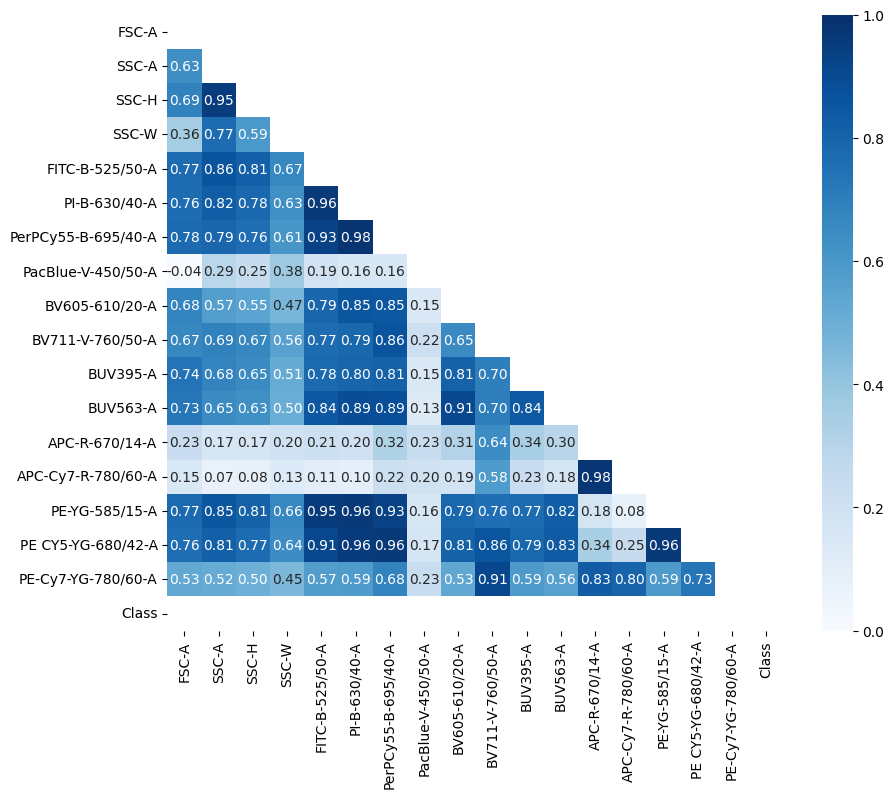

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

my_mask = np.triu(np.ones_like(doxCorr,dtype=bool))

plt.figure(figsize=(10,8)) #width, height
sns.heatmap(doxCorr, cmap="Blues", vmin=0, vmax=1,
          annot=True, fmt="0.2f", square=True, mask=my_mask)

print("Heat map correlation matrix of the Dox Data")
plt.show()

plt.savefig("corrMatrixDox.svg")

Calculating VIF scores for Dox treated cells

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# closer the R^2 value to 1, the higher the value of VIF and the higher the multicollinearity with the particular independent variable.
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
X = doxCorr.iloc[:]
calc_vif(X)

When comparing VIF scores and the highly correlated relationships, these are the features according to our study that have lower VIF scores in the relationship. This means that they may be determined by the feature that it is highly correlated with.

These features that may be determined by another and may not need to be included if the original datas features when looking at just the Dox only dataset were used would be:
- BUV563-A
- SSC-A
- PE-Cy5-YG-680/42-A
- PE-YG-585/15-A
- PerPCy55-B-695/40-A
- PE-Cy7-YG-780/60-A
- APC-Cy7-R-780/60-A

Detecting Multicollinearity Using a Variance Inflation Factor

Correlation in the PLGA+Dox dataset

In [ ]:
#correlation matrix of the dox and plga treated cells
doxPlgaCorr = doxPlgaClean.corr()
doxPlgaCorr

,FSC-A,SSC-A,SSC-H,SSC-W,FITC-B-525/50-A,PI-B-630/40-A,PerPCy55-B-695/40-A,PacBlue-V-450/50-A,BV605-610/20-A,BV711-V-760/50-A,BUV395-A,BUV563-A,APC-R-670/14-A,APC-Cy7-R-780/60-A,PE-YG-585/15-A,PE CY5-YG-680/42-A,PE-Cy7-YG-780/60-A
FSC-A,1.000000,0.809270,0.824009,0.580842,0.841168,0.846428,0.846894,0.199945,0.821596,0.791994,0.831112,0.811415,0.424211,0.059190,0.877532,0.864914,0.823146
SSC-A,0.809270,1.000000,0.975662,0.812730,0.905604,0.910993,0.912302,0.421919,0.930085,0.861758,0.959032,0.853580,0.574403,0.161295,0.928384,0.915948,0.891270
SSC-H,0.824009,0.975662,1.000000,0.724552,0.881443,0.883979,0.884956,0.391388,0.896607,0.836278,0.924238,0.827921,0.562609,0.155259,0.896049,0.881079,0.857141
SSC-W,0.580842,0.812730,0.724552,1.000000,0.722913,0.740317,0.741036,0.459447,0.783899,0.709618,0.771383,0.704985,0.525684,0.232136,0.758938,0.756173,0.754471
FITC-B-525/50-A,0.841168,0.905604,0.881443,0.722913,1.000000,0.986788,0.980790,0.343283,0.973882,0.906719,0.904366,0.908770,0.514282,0.110155,0.959418,0.932875,0.896467
PI-B-630/40-A,0.846428,0.910993,0.883979,0.740317,0.986788,1.000000,0.998206,0.345665,0.967791,0.927216,0.905826,0.916629,0.508773,0.112254,0.973187,0.963012,0.927640
PerPCy55-B-695/40-A,0.846894,0.912302,0.884956,0.741036,0.980790,0.998206,1.000000,0.343624,0.963233,0.930731,0.905858,0.914495,0.513788,0.120256,0.973151,0.969374,0.936569
PacBlue-V-450/50-A,0.199945,0.421919,0.391388,0.459447,0.343283,0.345665,0.343624,1.000000,0.458028,0.322792,0.381558,0.331776,0.340816,0.198511,0.342626,0.336981,0.357074
BV605-610/20-A,0.821596,0.930085,0.896607,0.783899,0.973882,0.967791,0.963233,0.458028,1.000000,0.899408,0.915758,0.887856,0.545147,0.145478,0.954457,0.931999,0.901926
BV711-V-760/50-A,0.791994,0.861758,0.836278,0.709618,0.906719,0.927216,0.930731,0.322792,0.899408,1.000000,0.847225,0.844577,0.549743,0.201072,0.909659,0.913383,0.901670


Heat map correlation matrix of the Dox and PLGA Data


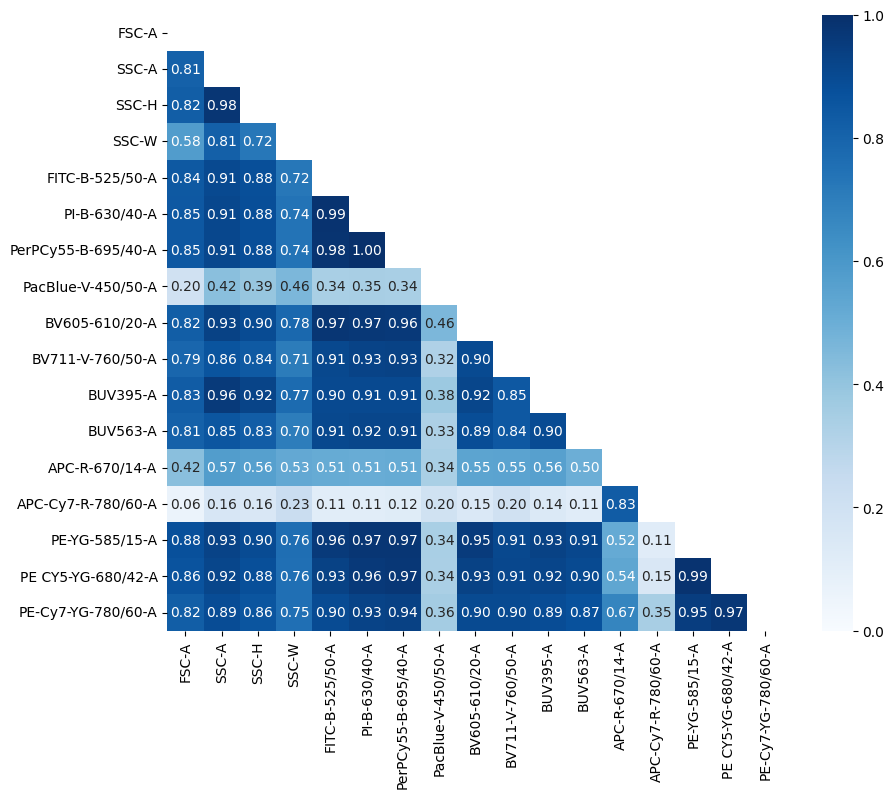

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

my_mask = np.triu(np.ones_like(doxPlgaCorr,dtype=bool))

plt.figure(figsize=(10,8)) #width, height
sns.heatmap(doxPlgaCorr, cmap="Blues", vmin=0, vmax=1,
          annot=True, fmt="0.2f", square=True, mask=my_mask)

print("Heat map correlation matrix of the Dox and PLGA Data")
plt.show()

plt.savefig("corrMatrixDoxPlga.svg")

Calculating VIF scores for Dox and PLGA treated cells

In [ ]:
Y = doxPlgaCorr.iloc[:,:]
calc_vif(Y)

,variables,VIF
0,FSC-A,1.526991e+03
1,SSC-A,1.452589e+05
2,SSC-H,4.877329e+04
3,SSC-W,2.330166e+03
4,FITC-B-525/50-A,2.169878e+05
5,PI-B-630/40-A,7.911183e+06
6,PerPCy55-B-695/40-A,7.294877e+06
7,PacBlue-V-450/50-A,1.115511e+02
8,BV605-610/20-A,3.244517e+04
9,BV711-V-760/50-A,1.260026e+03


These may be determined by another feature and may not need to be included when looking at the PLGA and Dox vif scores:
- BUV563-A
- SSC-H
- PE-Cy7-YG-780/60-A
- PE-YG-585/15-A
- PE CY5-YG-680/42-A
- PerPCy55-B-695/40-A
- PE-Cy7-YG-780/60-A
- PI-B-630/40-A
- APC-Cy7-R-780/60-A

Correlation in the untreated dataset

In [ ]:
#correlation matrix of the untreated cells
untCorr = untreatedDataClean.corr()
untCorr

,FSC-A,SSC-A,SSC-H,SSC-W,FITC-B-525/50-A,PI-B-630/40-A,PerPCy55-B-695/40-A,PacBlue-V-450/50-A,BV605-610/20-A,BV711-V-760/50-A,BUV395-A,BUV563-A,APC-R-670/14-A,APC-Cy7-R-780/60-A,PE-YG-585/15-A,PE CY5-YG-680/42-A,PE-Cy7-YG-780/60-A
FSC-A,1.000000,0.711147,0.732722,0.436114,0.619253,0.274515,0.604453,0.451618,0.234867,0.495098,0.614191,0.720863,0.541886,0.515506,0.703748,0.513034,0.490686
SSC-A,0.711147,1.000000,0.968658,0.663162,0.658039,0.321393,0.602522,0.568142,0.635498,0.519455,0.729866,0.567845,0.379774,0.359020,0.803162,0.526043,0.470220
SSC-H,0.732722,0.968658,1.000000,0.512228,0.614535,0.305808,0.597985,0.536728,0.589363,0.520460,0.695552,0.538182,0.381937,0.364781,0.770098,0.523334,0.472996
SSC-W,0.436114,0.663162,0.512228,1.000000,0.518119,0.232208,0.390349,0.408650,0.470415,0.330502,0.514571,0.442221,0.258128,0.235346,0.560547,0.344213,0.298639
FITC-B-525/50-A,0.619253,0.658039,0.614535,0.518119,1.000000,0.522329,0.545206,0.553474,0.375793,0.430411,0.533222,0.668379,0.436054,0.403252,0.690867,0.456885,0.414145
PI-B-630/40-A,0.274515,0.321393,0.305808,0.232208,0.522329,1.000000,0.253452,0.320311,0.202779,0.196705,0.254418,0.313064,0.181523,0.166115,0.324282,0.205136,0.183952
PerPCy55-B-695/40-A,0.604453,0.602522,0.597985,0.390349,0.545206,0.253452,1.000000,0.432555,0.148438,0.943983,0.456386,0.574795,0.872001,0.878438,0.634422,0.938315,0.934821
PacBlue-V-450/50-A,0.451618,0.568142,0.536728,0.408650,0.553474,0.320311,0.432555,1.000000,0.405753,0.341762,0.458431,0.483726,0.311902,0.285700,0.570706,0.365779,0.321382
BV605-610/20-A,0.234867,0.635498,0.589363,0.470415,0.375793,0.202779,0.148438,0.405753,1.000000,0.136745,0.588559,0.066696,-0.184790,-0.179299,0.363431,0.121338,0.049463
BV711-V-760/50-A,0.495098,0.519455,0.520460,0.330502,0.430411,0.196705,0.943983,0.341762,0.136745,1.000000,0.376856,0.430142,0.854750,0.873372,0.516287,0.971521,0.972631


Heat map correlation matrix of the untreated data


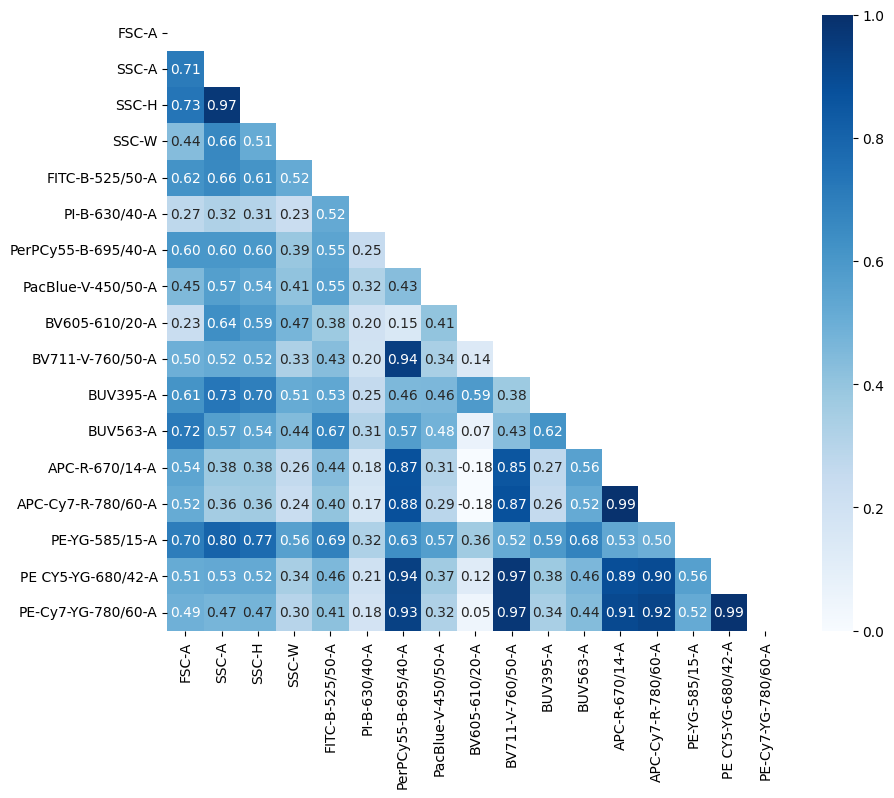

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

my_mask = np.triu(np.ones_like(untCorr,dtype=bool))

plt.figure(figsize=(10,8)) #width, height
sns.heatmap(untCorr, cmap="Blues", vmin=0, vmax=1,
          annot=True, fmt="0.2f", square=True, mask=my_mask)

print("Heat map correlation matrix of the untreated data")
plt.show()

plt.savefig("corrMatrixUnt.svg")

Calculating VIF scores for untreated cells

In [ ]:
Z = untCorr.iloc[:,:]
calc_vif(Z)

,variables,VIF
0,FSC-A,220.333183
1,SSC-A,29965.929321
2,SSC-H,19705.616321
3,SSC-W,669.605916
4,FITC-B-525/50-A,99.696275
5,PI-B-630/40-A,6.448253
6,PerPCy55-B-695/40-A,3052.799934
7,PacBlue-V-450/50-A,24.231164
8,BV605-610/20-A,305.912157
9,BV711-V-760/50-A,9253.430485



When looking at the VIF Scores for the untreated cell data, these are the features that may be determined by another feature:
- BUV563-A
- SSC-A
- PE-Cy7-YG-780/60-A
- PE-YG-585/15-A
- SSC-H
- SSC-A
- PE CY5-YG-680/42-A
- BV711-V-760/50-A
- FITC-B-525/50-A
- APC-Cy7-R-780/60-A


Compare all of the values in the correlation dataframe for each of the three classes to see if there are high correlation across all 3 classes

In [ ]:
#create three arrays to hold the values
dox=[]
doxPlga=[]
unt=[]
across=set() #array for holding the values corresponding to relationship across all 3

for i in doxCorr: #getting just the values/floats
  for j in doxCorr[i]:
    if(j!=1): #if the value is not 1, meaning a correlation to itself
      dox.append(j)
for i in doxPlgaCorr:
  for j in doxPlgaCorr[i]:
    if(j!=1):
      doxPlga.append(j)
for i in untCorr:
  for j in untCorr[i]:
    if(j!=1):
      unt.append(j)

for i in range(len(dox)): #iterating through all three classes at once to see if a high correlation exists across all three
  if(dox[i]>=0.7 and doxPlga[i]>=0.7 and unt[i]>=0.7): #if the num at this index is greater than .7 in all classes
    across.add(dox[i])

across

{0.7272335861531593,
 0.7311688060955899,
 0.7709652541291779,
 0.8054882107449668,
 0.854032613429014,
 0.8585208940196697,
 0.8631956116640264,
 0.9114396133276165,
 0.9520504837692016,
 0.9619299701673848,
 0.977901686432481}

These are the relationships found that are highly correlated across all three classes.

The relationship that these represent are:
- FSC-A and BUV563-A
- SSC-A and SSA-H
- PE-Cy7-YG-780/60-A and PE CY5-YG-680/42-A
- PE-YG-585/15-A and FSC-A
- PE-YG-585/15-A and SSC-H
- PE-YG-585/15-A and SSC-A
- PE CY5-YG-680/42-A and BV711-V-760/50-A
- BV711-V-760/50-A and PerPCy55-B-695/40-A
- PE-Cy7-YG-780/60-A and BV711-V-760/50-A
- FITC-B-525/50-A and PI-B-630/40-A
- APC-R-670/14-A and APC-Cy7-R-780/60-A


Taking into consideration biological context, VIF scores across all classes, and correlation these are the features that might be eligible for removal if using the original datasets features:
- PI-B-630/40-A
- PE-Cy7-YG-780/60-A
- PE CY5-YG-680/42-A
- PE-YG-585/15-A
- APC-Cy7-R-780/60-A
- BUV563-A

# boxplots for features

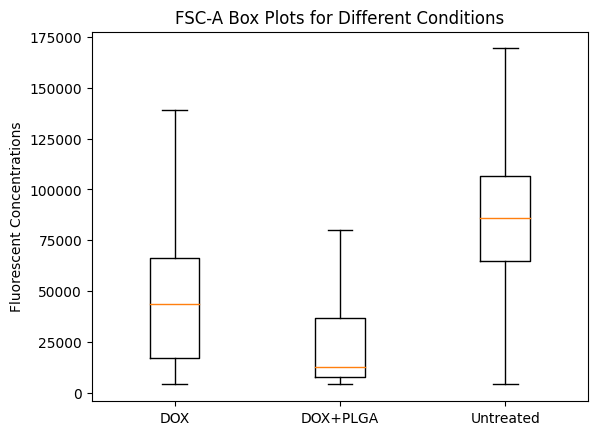

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.boxplot([doxClean["FSC-A"], doxPlgaClean["FSC-A"], untreatedDataClean["FSC-A"]], showfliers=False)
plt.rcParams["font.serif"] = "Times New Roman"
plt.title('FSC-A Box Plots for Different Conditions')
plt.ylabel('Fluorescent Concentrations')
plt.xticks([1, 2, 3], ['DOX', 'DOX+PLGA', 'Untreated'])
plt.xlabel("Treatment Type")
plt.savefig("boxFSC-A.svg") #save the figure with svg

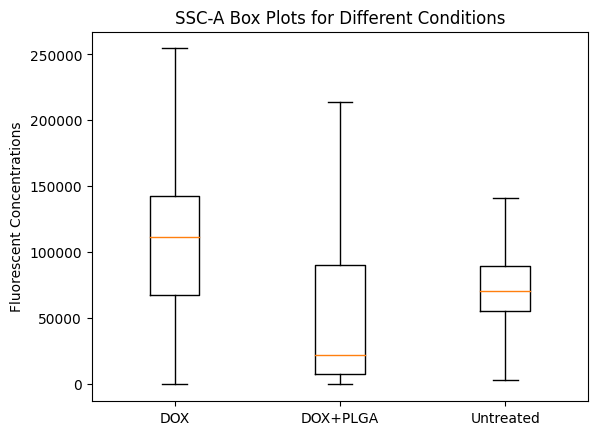

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.boxplot([doxClean["SSC-A"], doxPlgaClean["SSC-A"], untreatedDataClean["SSC-A"]], showfliers=False)
plt.title('SSC-A Box Plots for Different Conditions')
plt.ylabel('Fluorescent Concentrations')
plt.xticks([1, 2, 3], ['DOX', 'DOX+PLGA', 'Untreated'])
plt.xlabel("Treatment Type")
plt.savefig("boxSSC-A.svg") #save the figure with svg

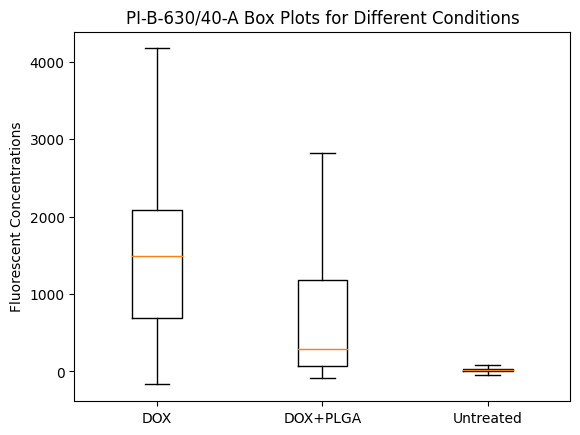

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.boxplot([doxClean["PI-B-630/40-A"], doxPlgaClean["PI-B-630/40-A"], untreatedDataClean["PI-B-630/40-A"]], showfliers=False)
plt.title('PI-B-630/40-A Box Plots for Different Conditions')
plt.ylabel('Fluorescent Concentrations')
plt.xticks([1, 2, 3], ['DOX', 'DOX+PLGA', 'Untreated'])
plt.xlabel("Treatment Type")
plt.savefig("boxPI-B.svg") #save the figure with svg

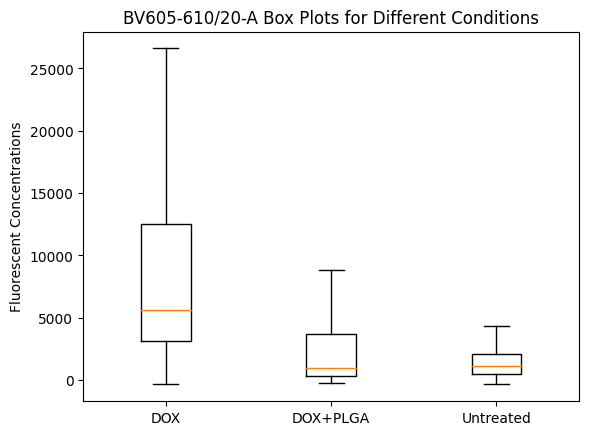

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.boxplot([doxClean["BV605-610/20-A"], doxPlgaClean["BV605-610/20-A"], untreatedDataClean["BV605-610/20-A"]], showfliers=False)
plt.title('BV605-610/20-A Box Plots for Different Conditions')
plt.ylabel('Fluorescent Concentrations')
plt.xticks([1, 2, 3], ['DOX', 'DOX+PLGA', 'Untreated'])
plt.xlabel("Treatment Type")
plt.savefig("boxBV605.svg") #save the figure with svg

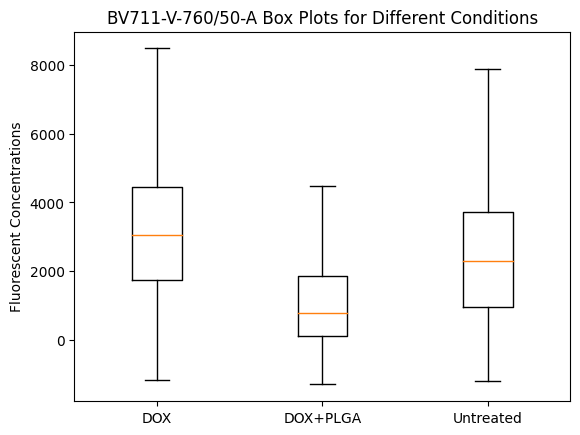

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.boxplot([doxClean["BV711-V-760/50-A"], doxPlgaClean["BV711-V-760/50-A"], untreatedDataClean["BV711-V-760/50-A"]], showfliers=False)
plt.title('BV711-V-760/50-A Box Plots for Different Conditions')
plt.ylabel('Fluorescent Concentrations')
plt.xticks([1, 2, 3], ['DOX', 'DOX+PLGA', 'Untreated'])
plt.xlabel("Treatment Type")
plt.savefig("boxBV711.svg") #save the figure with svg

#Histograms for features

 Histograms for features based on class

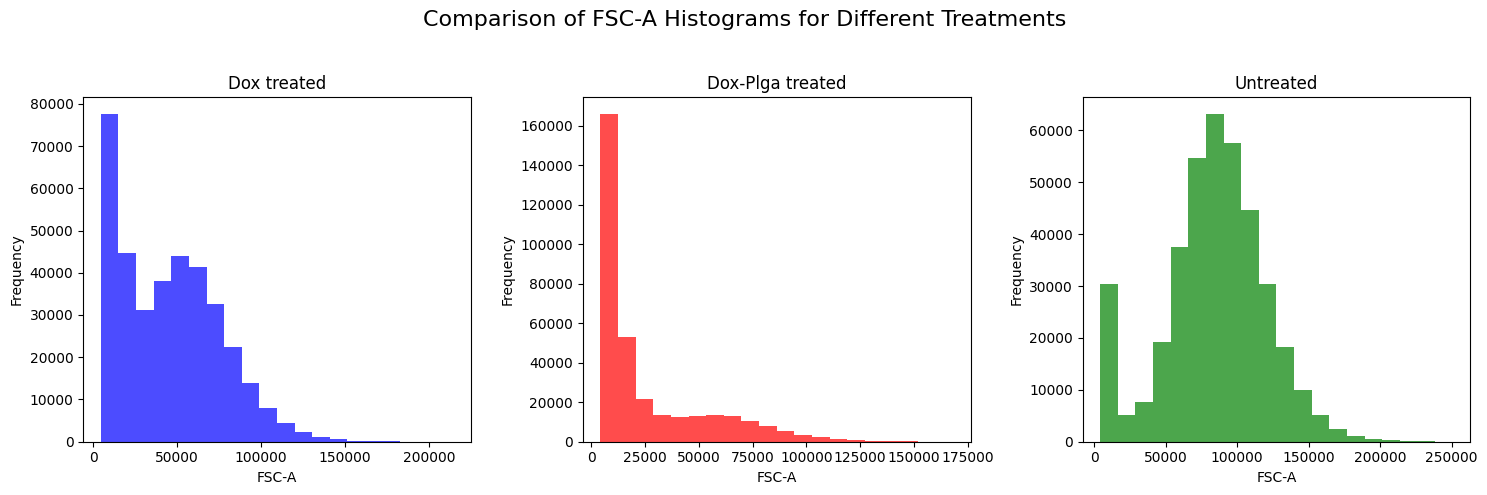

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#plotting the three classes and their FSC-A histograms
fig, axs = plt.subplots(1,3, figsize=(15, 5))
axs[0].hist(doxClean["FSC-A"], bins=20, color="b", alpha=0.7) #plotting histogram
axs[0].set_title('Dox treated')
axs[0].set_xlabel('FSC-A') #setting x and y labels
axs[0].set_ylabel('Frequency')

axs[1].hist(doxPlgaClean["FSC-A"], bins=20, color="r", alpha=0.7)
axs[1].set_title('Dox-Plga treated')
axs[1].set_xlabel('FSC-A')
axs[1].set_ylabel('Frequency')

axs[2].hist(untreatedDataClean["FSC-A"], bins=20, color="g", alpha=0.7)
axs[2].set_title('Untreated')
axs[2].set_xlabel('FSC-A')
axs[2].set_ylabel('Frequency')

fig.suptitle('Comparison of FSC-A Histograms for Different Treatments', fontsize=16) #super title

plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.savefig("histFSC-A.svg") #save the figure with svg

For the DOX treated, it indicates that the fluorescent concentration of FSC-A which indicates the size of the cell is. The untreated distribution has a roughly symmetric distirbution where as the treated histograms has a right skewed distribution which indicates that after PLGA + DOX treatment, the size of the cells has decreased. It helped us understand the range of the data and viewed the scope of the outliers. It helped us choose IQR *3 instead of IQR * 1.5 we wanted to keep the general shape of the data to be representative of the original data before removing the outliers.

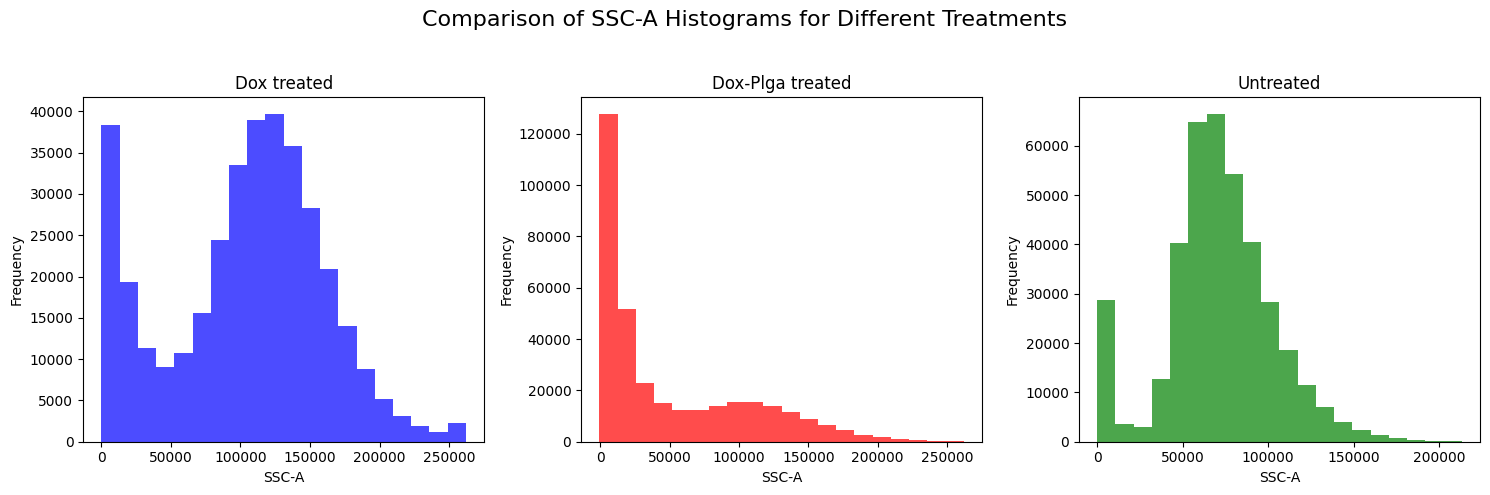

In [ ]:
#plotting the three classes and their SSC-A histograms
fig, axs = plt.subplots(1,3, figsize=(15, 5))
axs[0].hist(doxClean["SSC-A"], bins=20, color="b", alpha=0.7) #plotting histogram
axs[0].set_title('Dox treated')
axs[0].set_xlabel('SSC-A') #setting x and y labels
axs[0].set_ylabel('Frequency')

axs[1].hist(doxPlgaClean["SSC-A"], bins=20, color="r", alpha=0.7)
axs[1].set_title('Dox-Plga treated')
axs[1].set_xlabel('SSC-A')
axs[1].set_ylabel('Frequency')

axs[2].hist(untreatedDataClean["SSC-A"], bins=20, color="g", alpha=0.7)
axs[2].set_title('Untreated')
axs[2].set_xlabel('SSC-A')
axs[2].set_ylabel('Frequency')

fig.suptitle('Comparison of SSC-A Histograms for Different Treatments', fontsize=16) #super title

plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.savefig("histSSC-A.svg")

For the DOX treated, it indicates that the fluorescent concentration of SSC-A which indicates the granularity of the cell is. The untreated and DOX distribution has a roughly symmetric distribution. The large amount of cells with a lower concentration of SSC-A indicate the lack of granularity or material which it is composed of distinguishable pieces can be significant. This shows the significant effect of PLGA in simplifying the complexity of the complex internal structures within the cell. It helped us understand the range of the data and viewed the scope of the outliers. It helped us choose IQR *3 instead of IQR * 1.5 we wanted to keep the general shape of the data to be representative of the original data before removing the outliers.

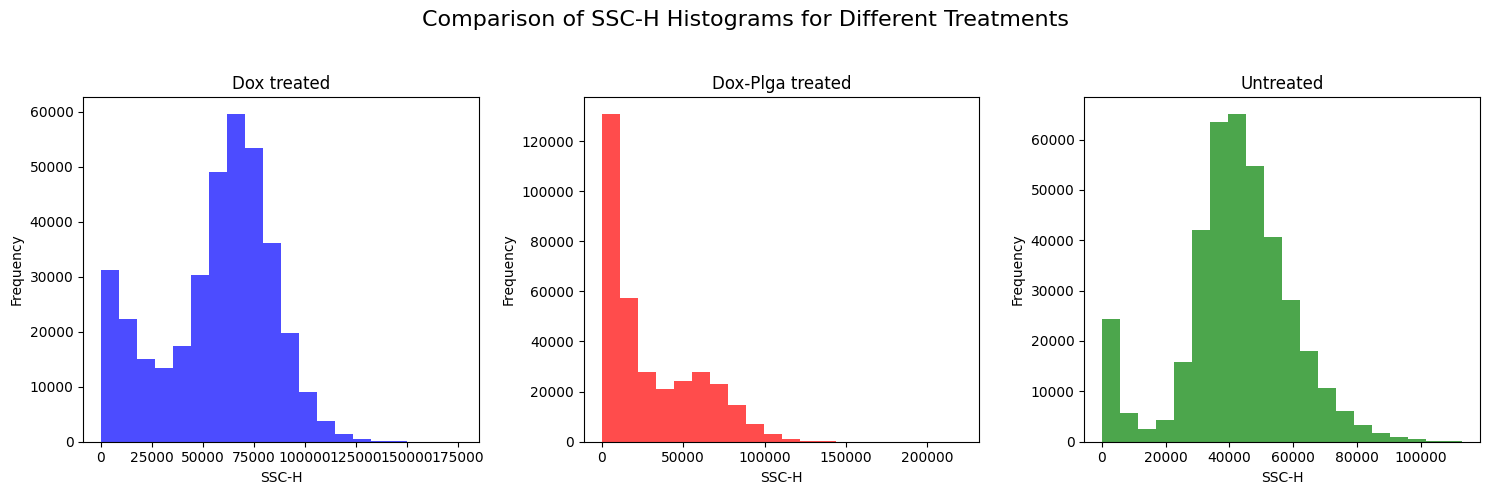

In [ ]:
#plotting the three classes and their SSC-H histograms
fig, axs = plt.subplots(1,3, figsize=(15, 5))
axs[0].hist(doxClean["SSC-H"], bins=20, color="b", alpha=0.7) #plotting histogram
axs[0].set_title('Dox treated')
axs[0].set_xlabel('SSC-H') #setting x and y labels
axs[0].set_ylabel('Frequency')

axs[1].hist(doxPlgaClean["SSC-H"], bins=20, color="r", alpha=0.7)
axs[1].set_title('Dox-Plga treated')
axs[1].set_xlabel('SSC-H')
axs[1].set_ylabel('Frequency')

axs[2].hist(untreatedDataClean["SSC-H"], bins=20, color="g", alpha=0.7)
axs[2].set_title('Untreated')
axs[2].set_xlabel('SSC-H')
axs[2].set_ylabel('Frequency')

fig.suptitle('Comparison of SSC-H Histograms for Different Treatments', fontsize=16) #super title

plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.savefig("histSSC-H.svg")

For the DOX treated, it indicates that the fluorescent concentration of SSC-H which indicates the granularity similar effect of the SSC-A. There is a signicantly less spread out distribution of the DOX+PLGA histogram which indicates the more precise mechanism of DOX with PLGA as its carrier. The untreated and DOX distribution has a roughly symmetric distribution. The large amount of cells with a lower concentration of SSC-A indicate the lack of granularity or material which it is composed of distinguishable pieces can be significant. This shows the significant effect of PLGA in simplifying the complexity of the complex internal structures within the cell.

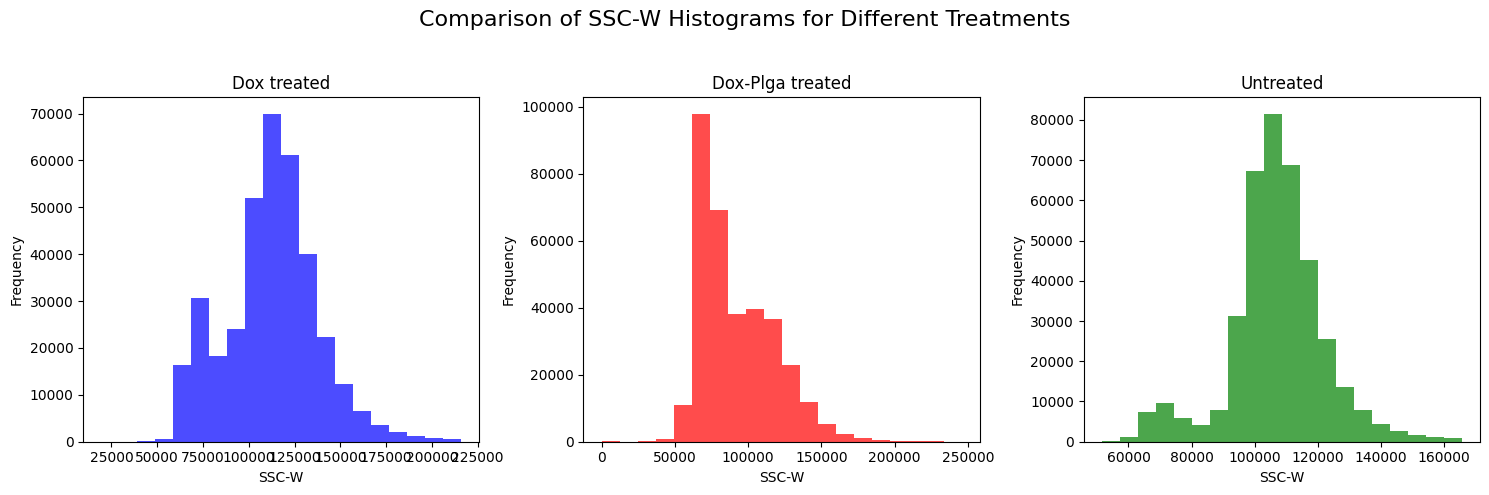

In [ ]:
#plotting the three classes and their SSC-W histograms
fig, axs = plt.subplots(1,3, figsize=(15, 5))
axs[0].hist(doxClean["SSC-W"], bins=20, color="b", alpha=0.7) #plotting histogram
axs[0].set_title('Dox treated')
axs[0].set_xlabel('SSC-W') #setting x and y labels
axs[0].set_ylabel('Frequency')

axs[1].hist(doxPlgaClean["SSC-W"], bins=20, color="r", alpha=0.7)
axs[1].set_title('Dox-Plga treated')
axs[1].set_xlabel('SSC-W')
axs[1].set_ylabel('Frequency')

axs[2].hist(untreatedDataClean["SSC-W"], bins=20, color="g", alpha=0.7)
axs[2].set_title('Untreated')
axs[2].set_xlabel('SSC-W')
axs[2].set_ylabel('Frequency')

fig.suptitle('Comparison of SSC-W Histograms for Different Treatments', fontsize=16) #super title

plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.savefig("histSSC-W.svg")

For the DOX treated, it indicates that the fluorescent concentration of SSC-W which indicates the granularity similar effect of the SSC-A. There is a signicantly less spread out distribution of the DOX+PLGA histogram which indicates the more precise and consistent mechanism of DOX with PLGA as its carrier. The histograms in general have a roughly symmmetric distrbution with PLGA+DOX having a more close knitted relationship with a slight right skew indicating the function of PLGA in the SSC-W characteristic of the cells to be more on the lower end of fluorescent concentration. This indicates function of PLGA's efforts towards simplifying the internal structure.

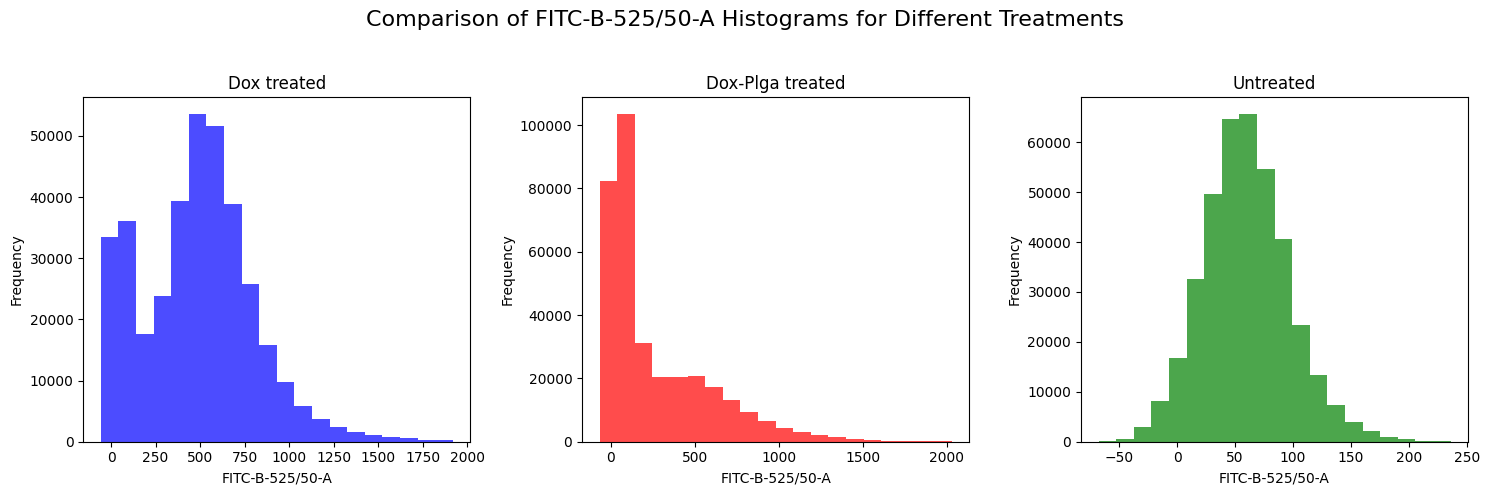

In [ ]:
#plotting the three classes and their FITC-B-525/50-A histograms
fig, axs = plt.subplots(1,3, figsize=(15, 5))
axs[0].hist(doxClean["FITC-B-525/50-A"], bins=20, color="b", alpha=0.7) #plotting histogram
axs[0].set_title('Dox treated')
axs[0].set_xlabel('FITC-B-525/50-A') #setting x and y labels
axs[0].set_ylabel('Frequency')

axs[1].hist(doxPlgaClean["FITC-B-525/50-A"], bins=20, color="r", alpha=0.7)
axs[1].set_title('Dox-Plga treated')
axs[1].set_xlabel('FITC-B-525/50-A')
axs[1].set_ylabel('Frequency')

axs[2].hist(untreatedDataClean["FITC-B-525/50-A"], bins=20, color="g", alpha=0.7)
axs[2].set_title('Untreated')
axs[2].set_xlabel('FITC-B-525/50-A')
axs[2].set_ylabel('Frequency')

fig.suptitle('Comparison of FITC-B-525/50-A Histograms for Different Treatments', fontsize=16) #super title

plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.savefig("histFITC.svg")

FITC-B-525/50-A is a channel that measures the fluorescence amount emitted from cells indicating sytox, showing programmed cell death. Sytox is a dye that stains cells based on how compromised their membranes are. By visualizing the data using histograms, we are able to see that when treated with Dox alone, the frequency of greater amounts of sytox increases greatly. We can also see that when treated with Dox carried by the polymer, the sytox is less. This indicates that when treated with PLGA, the polymer targets tumor cells directly while leaving normal cells alone to a greater degree than when just treated with the chemotherapeutic drug.

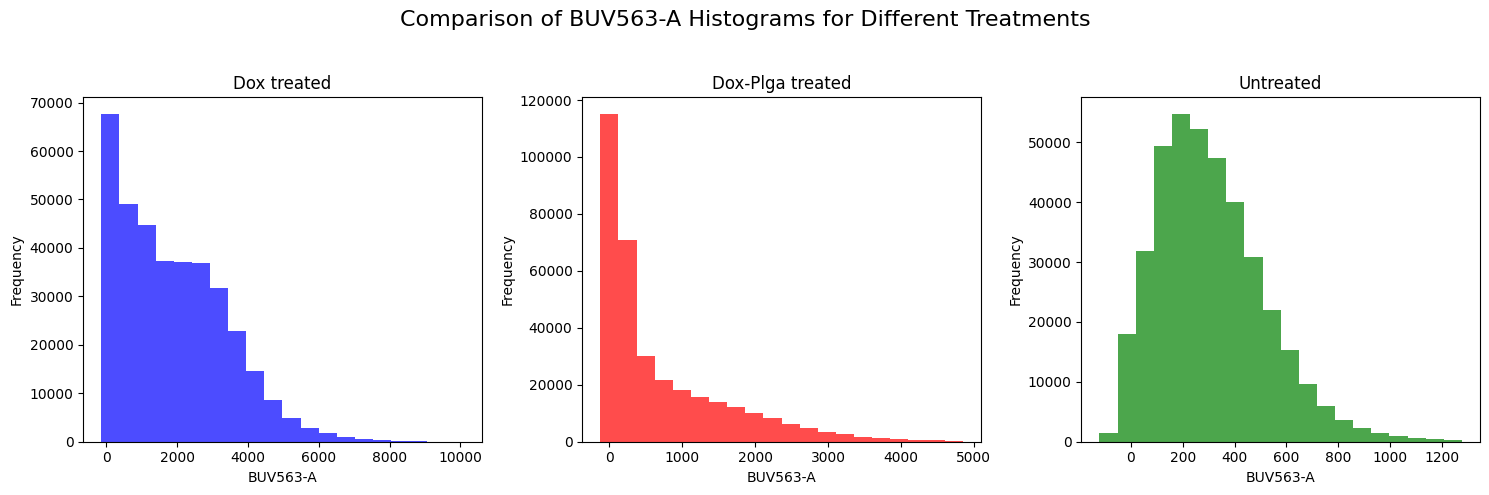

In [ ]:
#plotting the three classes and their BUV563-A histograms
fig, axs = plt.subplots(1,3, figsize=(15, 5))
axs[0].hist(doxClean["BUV563-A"], bins=20, color="b", alpha=0.7) #plotting histogram
axs[0].set_title('Dox treated')
axs[0].set_xlabel('BUV563-A') #setting x and y labels
axs[0].set_ylabel('Frequency')

axs[1].hist(doxPlgaClean["BUV563-A"], bins=20, color="r", alpha=0.7)
axs[1].set_title('Dox-Plga treated')
axs[1].set_xlabel('BUV563-A')
axs[1].set_ylabel('Frequency')

axs[2].hist(untreatedDataClean["BUV563-A"], bins=20, color="g", alpha=0.7)
axs[2].set_title('Untreated')
axs[2].set_xlabel('BUV563-A')
axs[2].set_ylabel('Frequency')

fig.suptitle('Comparison of BUV563-A Histograms for Different Treatments', fontsize=16) #super title

plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.savefig("histBUV563.svg")

BUV-563 is also a channel that measure the fluorescence emitted by a fluorophore meant to indicate sytox amount, or cell death. Again, when treated with just Dox alone we see greater frequency of higher levels of sytox, indicating more cell death. When treated with both PLGA and Dox, the cell death is a lot less. If we look at the ranges of the three datasets across classes, we see that untreated cell death ranges from 0 to about 1300, while for PLGA and Dox it ranges from 0 to about 5000. The cell death flourescence levels for just Dox range from 0 to about 11,000, so we can see that when treated with PLGA the cell death is far closer to the untreated cells.

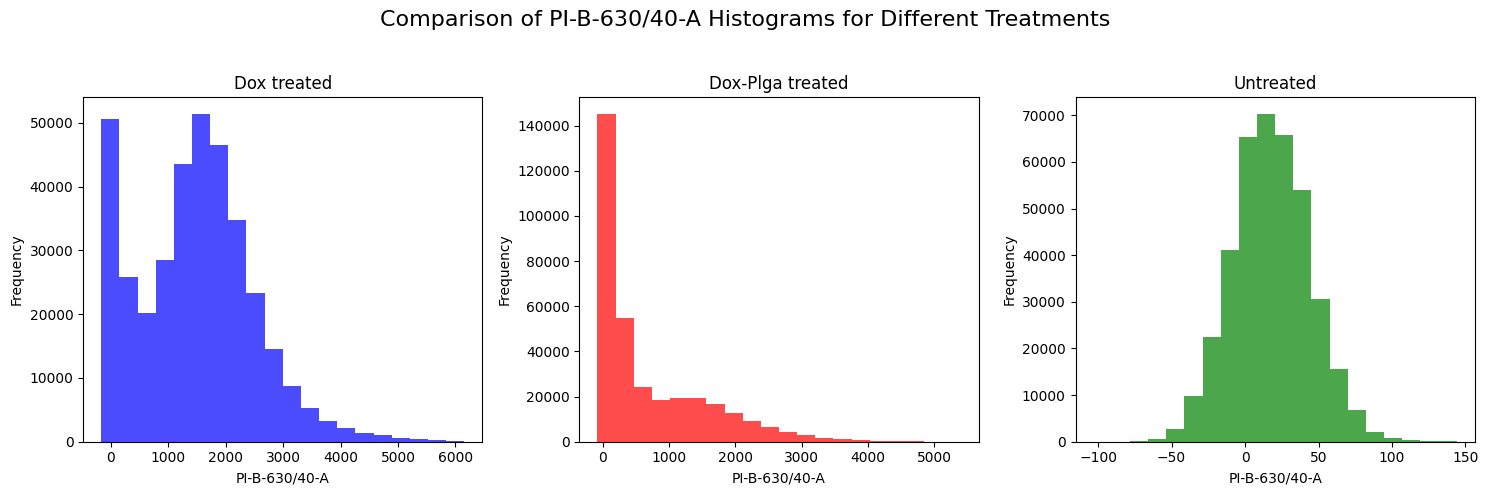

In [ ]:
#plotting the three classes and their PI-B-630/40-A-A histograms
fig, axs = plt.subplots(1,3, figsize=(15, 5))
axs[0].hist(doxClean["PI-B-630/40-A"], bins=20, color="b", alpha=0.7) #plotting histogram
axs[0].set_title('Dox treated')
axs[0].set_xlabel('PI-B-630/40-A') #setting x and y labels
axs[0].set_ylabel('Frequency')

axs[1].hist(doxPlgaClean["PI-B-630/40-A"], bins=20, color="r", alpha=0.7)
axs[1].set_title('Dox-Plga treated')
axs[1].set_xlabel('PI-B-630/40-A')
axs[1].set_ylabel('Frequency')

axs[2].hist(untreatedDataClean["PI-B-630/40-A"], bins=20, color="g", alpha=0.7)
axs[2].set_title('Untreated')
axs[2].set_xlabel('PI-B-630/40-A')
axs[2].set_ylabel('Frequency')

fig.suptitle('Comparison of PI-B-630/40-A Histograms for Different Treatments', fontsize=16) #super title

plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.savefig("histPI-B.svg")

For the DOX treated, it indicates that the fluorescent concentration of PI-B. There is a rough symmetric distrbution for the untreated histogram. The DOX data is also right skewed but DOX+PLGA is more significantly so. Which indicates There is a signicantly less spread out distribution of the DOX+PLGA histogram which indicates the more precise mechanism of DOX with PLGA as its carrier. This indicates to the cell viability of DOX which is a significantly low concentration in indication to a low concentration as part of the function for PLGA and that it only enhances the feature of only targeting the tumor cells.

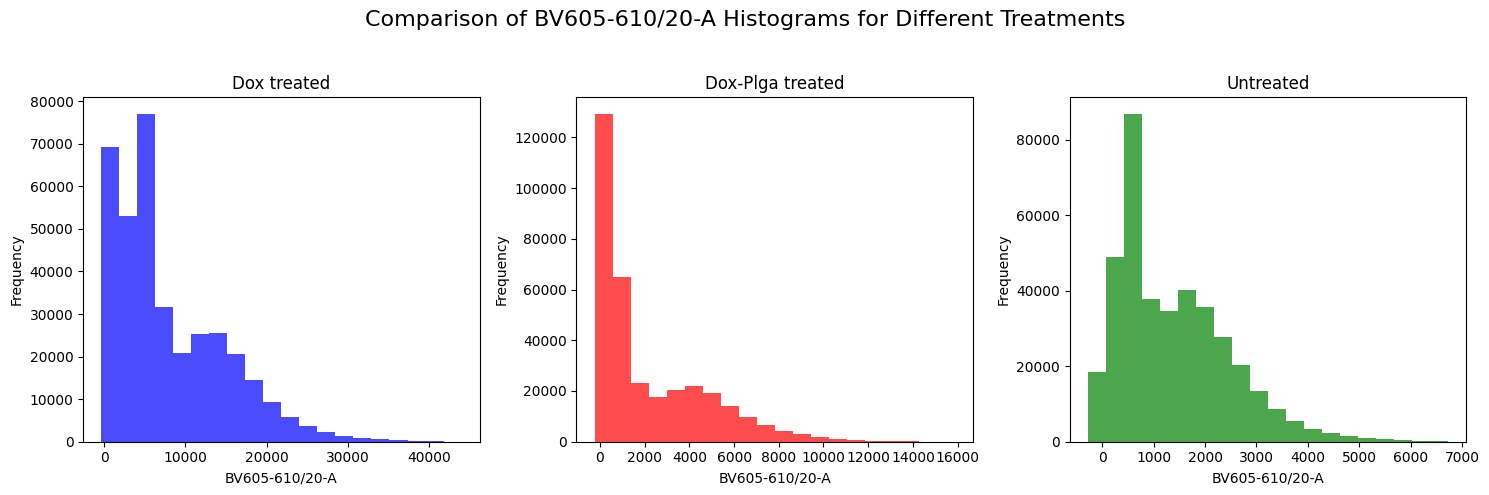

In [ ]:
#plotting the three classes and their BV605-610/20-A histograms
fig, axs = plt.subplots(1,3, figsize=(15, 5))
axs[0].hist(doxClean["BV605-610/20-A"], bins=20, color="b", alpha=0.7) #plotting histogram
axs[0].set_title('Dox treated')
axs[0].set_xlabel('BV605-610/20-A') #setting x and y labels
axs[0].set_ylabel('Frequency')

axs[1].hist(doxPlgaClean["BV605-610/20-A"], bins=20, color="r", alpha=0.7)
axs[1].set_title('Dox-Plga treated')
axs[1].set_xlabel('BV605-610/20-A')
axs[1].set_ylabel('Frequency')

axs[2].hist(untreatedDataClean["BV605-610/20-A"], bins=20, color="g", alpha=0.7)
axs[2].set_title('Untreated')
axs[2].set_xlabel('BV605-610/20-A')
axs[2].set_ylabel('Frequency')

fig.suptitle('Comparison of BV605-610/20-A Histograms for Different Treatments', fontsize=16) #super title

plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.savefig("histBV605.svg")

For the DOX treated, it indicates that the fluorescent concentration of BV605. There is more spread that exists with untreated and DOX compared to DOX+PLGA which highlights the use of PLGA in enhancing the consistently of DOX to be only targeting the tumor cells.

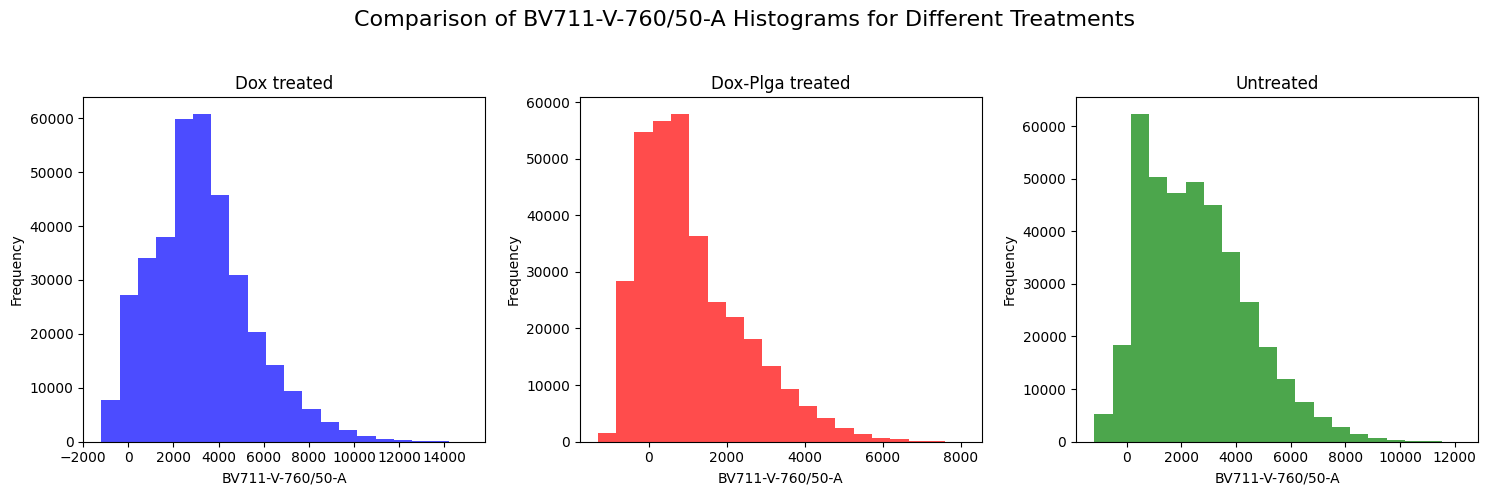

In [ ]:
#plotting the three classes and their BV711-V-760/50-A histograms
fig, axs = plt.subplots(1,3, figsize=(15, 5))
axs[0].hist(doxClean["BV711-V-760/50-A"], bins=20, color="b", alpha=0.7) #plotting histogram
axs[0].set_title('Dox treated')
axs[0].set_xlabel('BV711-V-760/50-A') #setting x and y labels
axs[0].set_ylabel('Frequency')

axs[1].hist(doxPlgaClean["BV711-V-760/50-A"], bins=20, color="r", alpha=0.7)
axs[1].set_title('Dox-Plga treated')
axs[1].set_xlabel('BV711-V-760/50-A')
axs[1].set_ylabel('Frequency')

axs[2].hist(untreatedDataClean["BV711-V-760/50-A"], bins=20, color="g", alpha=0.7)
axs[2].set_title('Untreated')
axs[2].set_xlabel('BV711-V-760/50-A')
axs[2].set_ylabel('Frequency')

fig.suptitle('Comparison of BV711-V-760/50-A Histograms for Different Treatments', fontsize=16) #super title

plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.savefig("histBV711.svg")

For the ADN, it is the strive for cell survival and maintenance and it indicates the fluorescent concentration of BV711. The DOX-PLGA histogram shows slight changes towards the lower end of the concentration and indicates its simplicity which means there are less things to recycle hence the lower concentration.

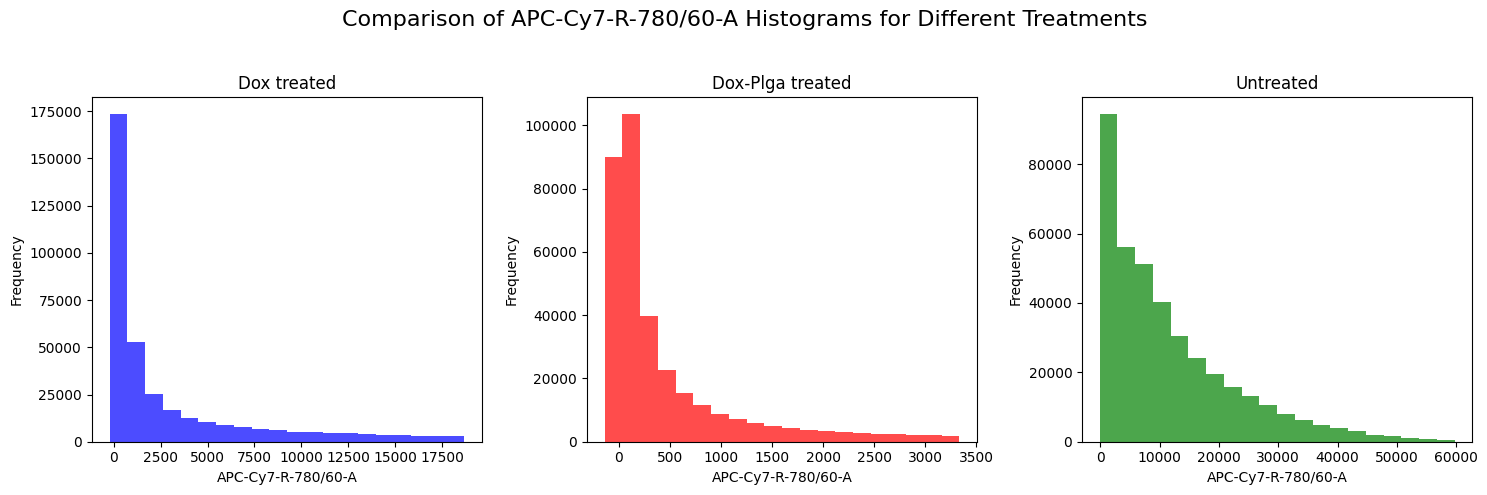

In [ ]:
#plotting the three classes and their APC-Cy7-R-780/60-A histograms
fig, axs = plt.subplots(1,3, figsize=(15, 5))
axs[0].hist(doxClean["APC-Cy7-R-780/60-A"], bins=20, color="b", alpha=0.7) #plotting histogram
axs[0].set_title('Dox treated')
axs[0].set_xlabel('APC-Cy7-R-780/60-A') #setting x and y labels
axs[0].set_ylabel('Frequency')

axs[1].hist(doxPlgaClean["APC-Cy7-R-780/60-A"], bins=20, color="r", alpha=0.7)
axs[1].set_title('Dox-Plga treated')
axs[1].set_xlabel('APC-Cy7-R-780/60-A')
axs[1].set_ylabel('Frequency')

axs[2].hist(untreatedDataClean["APC-Cy7-R-780/60-A"], bins=20, color="g", alpha=0.7)
axs[2].set_title('Untreated')
axs[2].set_xlabel('APC-Cy7-R-780/60-A')
axs[2].set_ylabel('Frequency')

fig.suptitle('Comparison of APC-Cy7-R-780/60-A Histograms for Different Treatments', fontsize=16) #super title

plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.savefig("histAPC-Cy7.svg")

For the APC-Cy7 780, which also is indicative to the autophagy of the cells in the experiment. The DOX-PLGA histogram is more raised due to the less spread otu it is compared to the sole DOX treatment. it also has more concentration values of cells that are on the lower end of the amount of APC CY 7 780. This is consistent with BV711 as it demonstrates the simplicity which means there are less things to recycle hence the lower concentration.

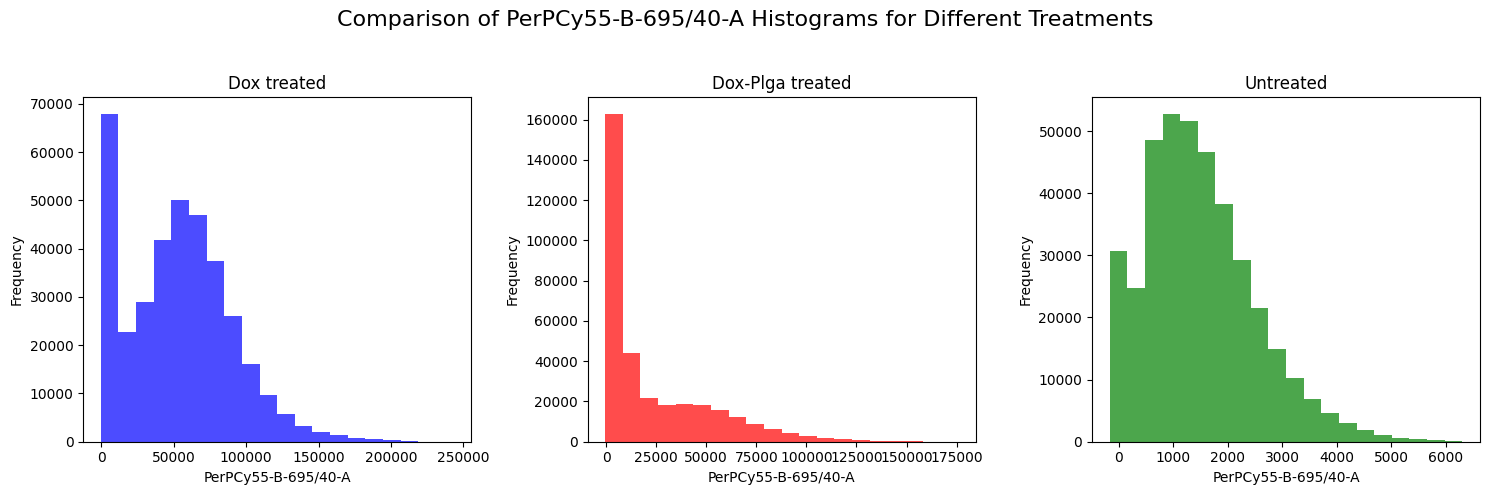

In [ ]:
#plotting the three classes and their PerPCy55-B-695/40-A histograms
fig, axs = plt.subplots(1,3, figsize=(15, 5))
axs[0].hist(doxClean["PerPCy55-B-695/40-A"], bins=20, color="b", alpha=0.7)
axs[0].set_title('Dox treated')
axs[0].set_xlabel('PerPCy55-B-695/40-A')
axs[0].set_ylabel('Frequency')

axs[1].hist(doxPlgaClean["PerPCy55-B-695/40-A"], bins=20, color="r", alpha=0.7)
axs[1].set_title('Dox-Plga treated')
axs[1].set_xlabel('PerPCy55-B-695/40-A')
axs[1].set_ylabel('Frequency')

axs[2].hist(untreatedDataClean["PerPCy55-B-695/40-A"], bins=20, color="g", alpha=0.7)
axs[2].set_title('Untreated')
axs[2].set_xlabel('PerPCy55-B-695/40-A')
axs[2].set_ylabel('Frequency')

fig.suptitle('Comparison of PerPCy55-B-695/40-A Histograms for Different Treatments', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.savefig("histPerPCy55.svg")

For the PerPCy55 channel, it is used to measure the Peridinin-Chlorophyll-Protein and Cyanine dye that is injected into the cells of mice. The untreated has a large amount of values in a certain area and is less spread out compared to the other treatments. DOX -PLGA shows the most consistently with regards to fluroescent concentration recorded and its mode is significantly greater than the other values compared to the DOX treated histogram.

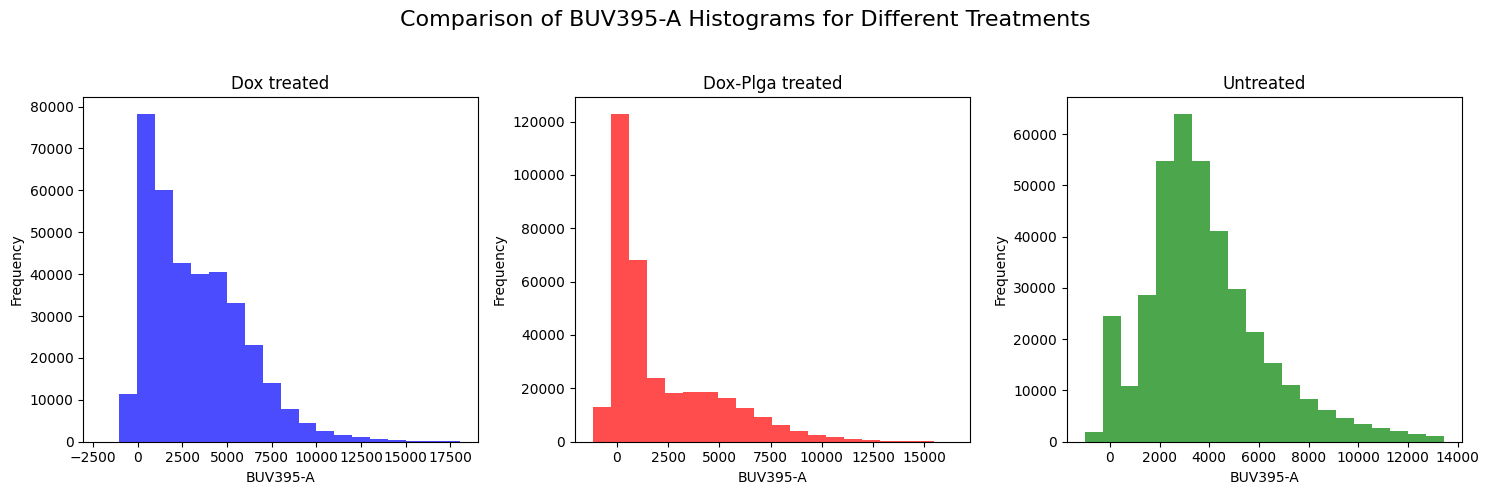

In [ ]:
#plotting the three classes and their BUV395-A histograms
fig, axs = plt.subplots(1,3, figsize=(15, 5))
axs[0].hist(doxClean["BUV395-A"], bins=20, color="b", alpha=0.7)
axs[0].set_title('Dox treated')
axs[0].set_xlabel('BUV395-A')
axs[0].set_ylabel('Frequency')

axs[1].hist(doxPlgaClean["BUV395-A"], bins=20, color="r", alpha=0.7)
axs[1].set_title('Dox-Plga treated')
axs[1].set_xlabel('BUV395-A')
axs[1].set_ylabel('Frequency')

axs[2].hist(untreatedDataClean["BUV395-A"], bins=20, color="g", alpha=0.7)
axs[2].set_title('Untreated')
axs[2].set_xlabel('BUV395-A')
axs[2].set_ylabel('Frequency')

fig.suptitle('Comparison of BUV395-A Histograms for Different Treatments', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.savefig("histBUV395.svg")

BUV395 is a fluorescence channel in the brilliant ultraviolet range and is filtering for the 395 nanometer part of the spectrum. We see that when the cells are administered with just Doxorubicin, the amount of fluorescence in  this channel goes way up, whereas the amount of fluorescence is controlled and decreased when administered with PLGA as the drug-carrying nanoparticle.

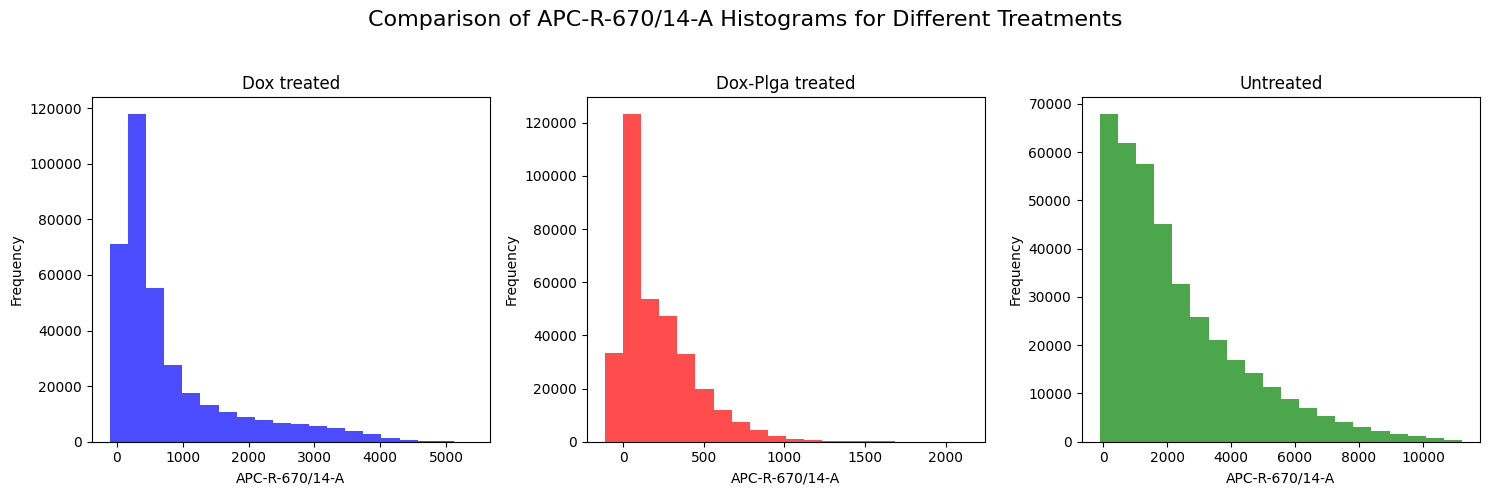

In [ ]:
#plotting the three classes and their APC-R-670/14-A histograms
fig, axs = plt.subplots(1,3, figsize=(15, 5))
axs[0].hist(doxClean["APC-R-670/14-A"], bins=20, color="b", alpha=0.7)
axs[0].set_title('Dox treated')
axs[0].set_xlabel('APC-R-670/14-A')
axs[0].set_ylabel('Frequency')

axs[1].hist(doxPlgaClean["APC-R-670/14-A"], bins=20, color="r", alpha=0.7)
axs[1].set_title('Dox-Plga treated')
axs[1].set_xlabel('APC-R-670/14-A')
axs[1].set_ylabel('Frequency')

axs[2].hist(untreatedDataClean["APC-R-670/14-A"], bins=20, color="g", alpha=0.7)
axs[2].set_title('Untreated')
axs[2].set_xlabel('APC-R-670/14-A')
axs[2].set_ylabel('Frequency')

fig.suptitle('Comparison of APC-R-670/14-A Histograms for Different Treatments', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.savefig("histAPC-R.svg")

APC-R-670/14-A is a channel that measures the fluorescence emitted from the APC protein and fluorophore that is excited by a red laser. It is looking for or filtering in the broadband filter of 670/14. The histograms show us that in comparison to the Dox and PLGA treated cells, the Dox only cells show a greater fluorescence level frequency.

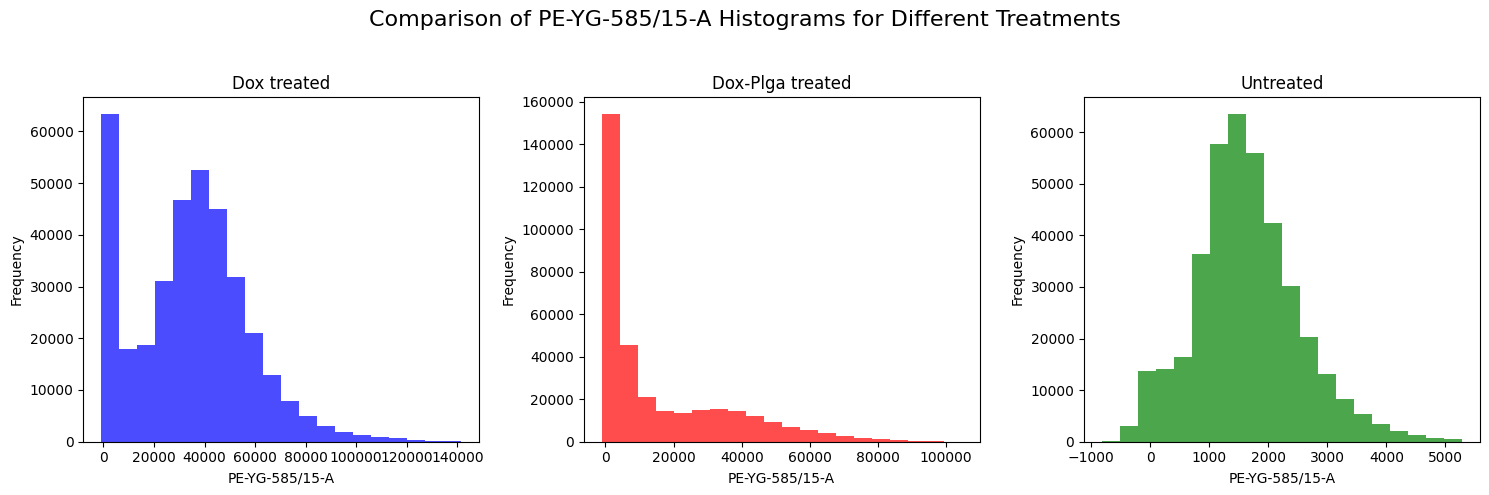

In [ ]:
#plotting the three classes and their PE-YG-585/15-A histograms
fig, axs = plt.subplots(1,3, figsize=(15, 5))
axs[0].hist(doxClean["PE-YG-585/15-A"], bins=20, color="b", alpha=0.7)
axs[0].set_title('Dox treated')
axs[0].set_xlabel('PE-YG-585/15-A')
axs[0].set_ylabel('Frequency')

axs[1].hist(doxPlgaClean["PE-YG-585/15-A"], bins=20, color="r", alpha=0.7)
axs[1].set_title('Dox-Plga treated')
axs[1].set_xlabel('PE-YG-585/15-A')
axs[1].set_ylabel('Frequency')

axs[2].hist(untreatedDataClean["PE-YG-585/15-A"], bins=20, color="g", alpha=0.7)
axs[2].set_title('Untreated')
axs[2].set_xlabel('PE-YG-585/15-A')
axs[2].set_ylabel('Frequency')

fig.suptitle('Comparison of PE-YG-585/15-A Histograms for Different Treatments', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.savefig("histPE-YG-585.svg")

For the PE YG 585, it is used to measure the red-color emission of Phycoerythrin fluorophore that is excited by a yellow green laser that is injected into the cells of mice. The untreated histogram is slightly symmetric compared to the other two treatment histograms. PLGA+DOX is significantly less spread out and the DOX treated more resembles untreated with a large amount of lower concentration. This can indicate the significant effect that PLGA has as a carrier for DOX as it makes it more concentrated on the tumor cells that it intends to target while decreasing the likelihood of  other side effects to happen.

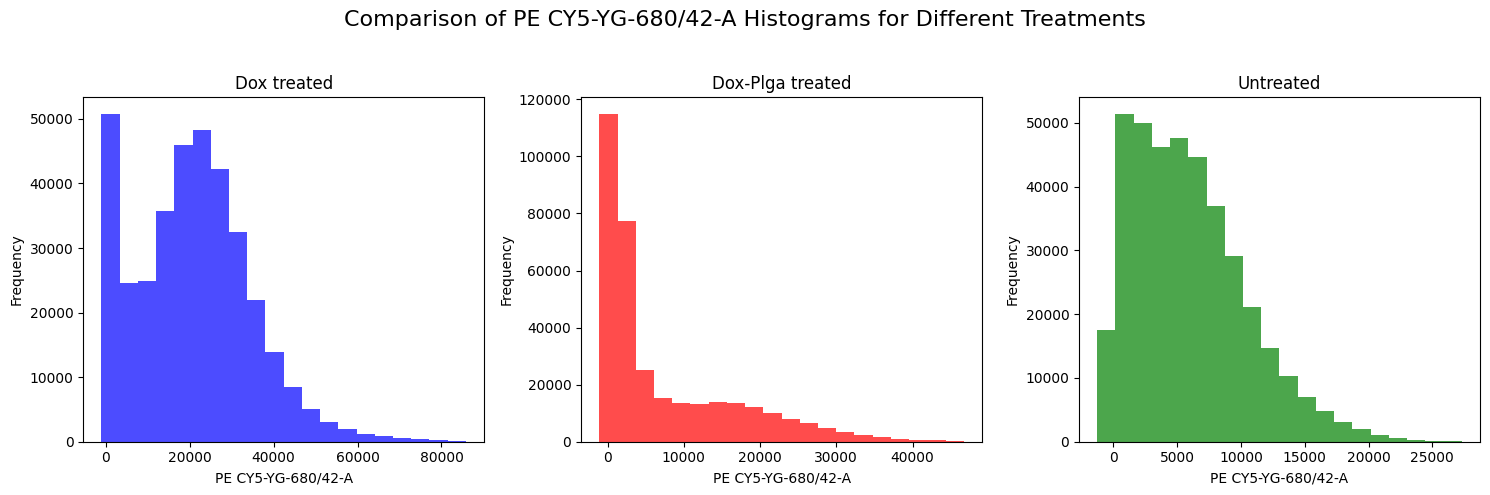

In [ ]:
#plotting the three classes and their PE CY5-YG-680/42-A histograms
fig, axs = plt.subplots(1,3, figsize=(15, 5))
axs[0].hist(doxClean["PE CY5-YG-680/42-A"], bins=20, color="b", alpha=0.7)
axs[0].set_title('Dox treated')
axs[0].set_xlabel('PE CY5-YG-680/42-A')
axs[0].set_ylabel('Frequency')

axs[1].hist(doxPlgaClean["PE CY5-YG-680/42-A"], bins=20, color="r", alpha=0.7)
axs[1].set_title('Dox-Plga treated')
axs[1].set_xlabel('PE CY5-YG-680/42-A')
axs[1].set_ylabel('Frequency')

axs[2].hist(untreatedDataClean["PE CY5-YG-680/42-A"], bins=20, color="g", alpha=0.7)
axs[2].set_title('Untreated')
axs[2].set_xlabel('PE CY5-YG-680/42-A')
axs[2].set_ylabel('Frequency')

fig.suptitle('Comparison of PE CY5-YG-680/42-A Histograms for Different Treatments', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.savefig("histPE-CY5-YG.svg")

For the PE YG 680, it is used to measure the emission of red-emitting tandem fluorophore that combines phycoerythrin (PE) and Cy5 that is excited by a yellow green laser that is injected into the cells of mice. The three histograms all have a roughly skewed right distribution with the untreated histogram being slightly less spread out and the DOX treated being more clustered. DOX -PLGA shows the most consistently with regards to fluroescent concentration recorded to the lower values of concentration indicating that the addition of PLGA makes the concentration of PE CY5 YG smaller.

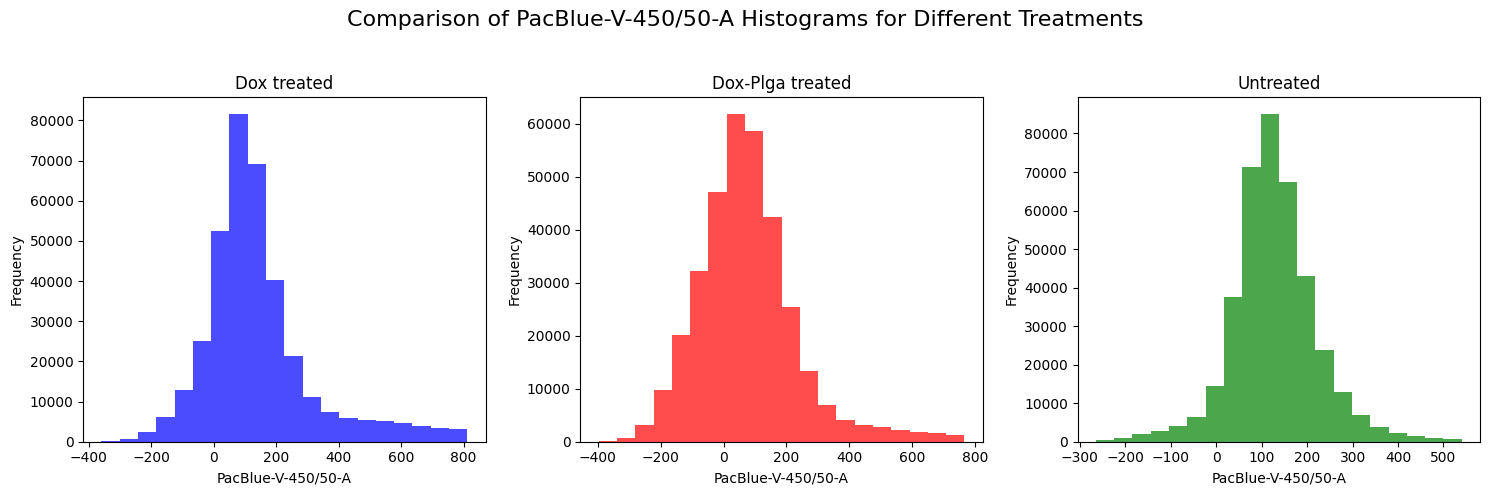

In [ ]:
#plotting the three classes and their PacBlue-V-450/50-A histograms
fig, axs = plt.subplots(1,3, figsize=(15, 5))
axs[0].hist(doxClean["PacBlue-V-450/50-A"], bins=20, color="b", alpha=0.7)
axs[0].set_title('Dox treated')
axs[0].set_xlabel('PacBlue-V-450/50-A')
axs[0].set_ylabel('Frequency')

axs[1].hist(doxPlgaClean["PacBlue-V-450/50-A"], bins=20, color="r", alpha=0.7)
axs[1].set_title('Dox-Plga treated')
axs[1].set_xlabel('PacBlue-V-450/50-A')
axs[1].set_ylabel('Frequency')

axs[2].hist(untreatedDataClean["PacBlue-V-450/50-A"], bins=20, color="g", alpha=0.7)
axs[2].set_title('Untreated')
axs[2].set_xlabel('PacBlue-V-450/50-A')
axs[2].set_ylabel('Frequency')

fig.suptitle('Comparison of PacBlue-V-450/50-A Histograms for Different Treatments', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.savefig("histPacBlue.svg")

For the PacBlue, it is used to measure the emission of pacific blue that is excited by a violet laser that is injected into the cells of mice. The three histograms all have a roughly symmetric distrbution with the untreated histogram being slightly less spread out and the DOX treated being more clustered The untreated has a large amount of values in a certain area and is less spread out compared to the other treatments. DOX -PLGA shows the most consistently with regards to fluroescent concentration recorded and its mode is significantly greater than the other values compared to the DOX treated histogram.

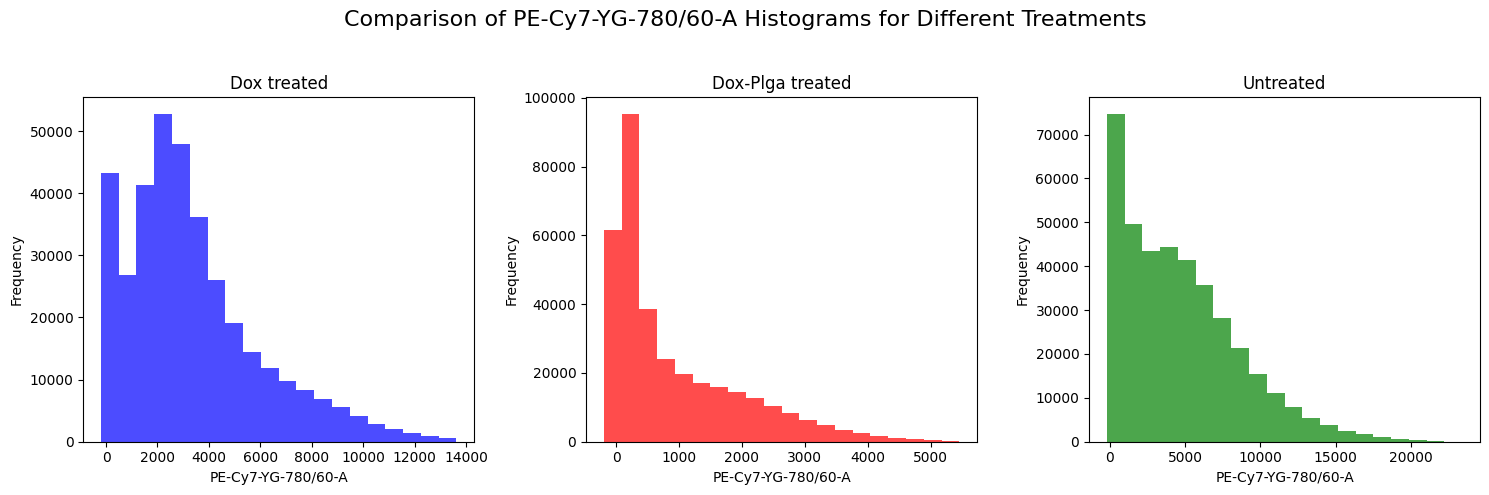

In [ ]:
#plotting the three classes and their PE-Cy7-YG-780/60-A histograms
fig, axs = plt.subplots(1,3, figsize=(15, 5))
axs[0].hist(doxClean["PE-Cy7-YG-780/60-A"], bins=20, color="b", alpha=0.7)
axs[0].set_title('Dox treated')
axs[0].set_xlabel('PE-Cy7-YG-780/60-A')
axs[0].set_ylabel('Frequency')

axs[1].hist(doxPlgaClean["PE-Cy7-YG-780/60-A"], bins=20, color="r", alpha=0.7)
axs[1].set_title('Dox-Plga treated')
axs[1].set_xlabel('PE-Cy7-YG-780/60-A')
axs[1].set_ylabel('Frequency')

axs[2].hist(untreatedDataClean["PE-Cy7-YG-780/60-A"], bins=20, color="g", alpha=0.7)
axs[2].set_title('Untreated')
axs[2].set_xlabel('PE-Cy7-YG-780/60-A')
axs[2].set_ylabel('Frequency')

fig.suptitle('Comparison of PE-Cy7-YG-780/60-A Histograms for Different Treatments', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.savefig("histPE-CY7-YG.svg")

The histogram for PE-Cy7-YG-780/60-A in the untreated cells is showing the frequency of cells reaching particular fluorescence values. PE-Cy7-YG-780/60-A is a fluorescence channel that is intended to measure autophagy using an autophagy detecting nanoparticle. Autophagy is a eukaryotic cellular process for cell survival by recycling cytoplasmic organic components. The histograms of this channel across all 3 classes indicate the autophagy that is normal for cells that have not been treated, as well as how autophagy increases greatly when treated with Dox. When the Dox is delivered with PLGA, the autophagy is much lower, which makes sense because when looking at the SSC-A we can see that the Dox and PLGA cells are less granular, meaning they have less intracellular structures to break down and recycle.

#Implementing PCA

Utilizing PCA to create a combination of the possible most effective features

In [ ]:
#apply PCA to the data.
from sklearn.decomposition import PCA

doxPca = PCA(random_state = 77)
doxPca.fit(doxClean)

PCA(random_state=77)

In [ ]:
feature_names = [f'feature_{i}' for i in range(doxClean.shape[1])]
doxPca_df = pd.DataFrame(doxPca.components_, columns=feature_names)
doxPca_df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16
0,0.284184,0.694719,0.323289,0.238667,0.003678,0.011540,0.415509,0.000541,0.060919,0.021657,0.026146,0.014565,0.002661,0.006950,0.268605,0.157063,0.019608
1,0.613593,-0.459822,-0.114439,-0.355956,0.002181,0.010161,0.455334,-0.002158,0.108694,0.021451,0.030130,0.022003,0.006081,0.026262,0.175720,0.137921,0.023059
2,-0.337162,-0.243811,-0.437583,0.615317,0.002081,0.010435,0.431931,0.001501,0.103520,0.023920,0.012885,0.017058,0.009392,0.043252,0.176268,0.156064,0.031211
3,0.646928,-0.055561,-0.173106,0.579706,-0.001255,-0.010878,-0.431171,-0.000469,-0.053033,-0.016994,0.007174,-0.010576,0.000161,0.002996,-0.098990,-0.114766,-0.010014
4,-0.036440,0.065410,-0.240719,-0.135603,0.004262,0.007223,-0.364205,-0.003831,-0.013972,-0.095726,-0.029975,-0.009703,-0.068571,-0.336175,0.786682,0.151699,-0.124024
5,-0.070998,-0.305763,0.492217,0.136590,-0.003145,-0.012975,-0.253113,0.006709,0.001106,0.100668,-0.030531,-0.015299,0.105082,0.517937,0.287510,0.375544,0.248892
6,0.052731,0.355305,-0.582117,-0.239989,-0.002142,-0.017492,-0.078956,-0.001663,-0.274353,0.131540,0.028117,-0.039531,0.095101,0.489011,-0.063669,0.248678,0.242857
7,0.010541,-0.128543,0.133995,0.080674,-0.002843,-0.007104,0.176104,-0.006047,-0.898693,0.049064,-0.252643,-0.113101,-0.057206,-0.186977,0.031074,0.038813,-0.020332
8,-0.018281,-0.006945,-0.008002,-0.010206,0.025189,-0.000627,0.101594,0.005807,-0.083690,0.030822,-0.047773,0.040147,0.080553,0.410956,0.380550,-0.810125,-0.010786
9,-0.030552,-0.052629,0.061443,0.019774,-0.001176,-0.014707,0.002762,0.001922,-0.250842,0.016588,0.952403,0.117292,-0.000040,-0.059850,0.047497,-0.031668,0.032166


These are the features composed by PCA, which are a combination

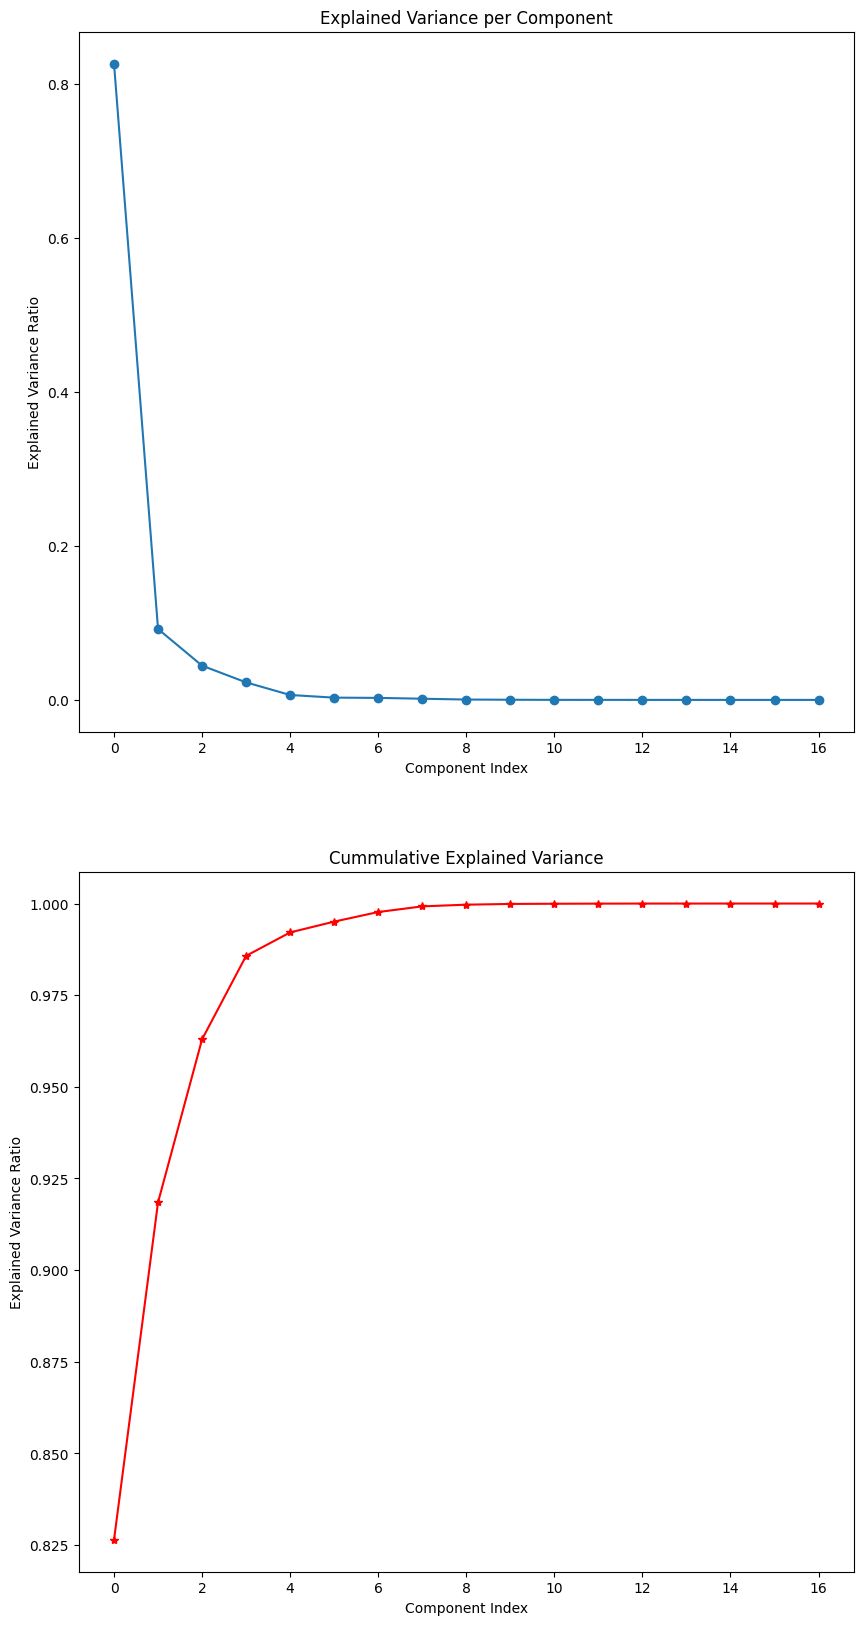

<Figure size 640x480 with 0 Axes>

In [ ]:
# Investigate the variance accounted for by each principal component.
plt.figure(figsize=(10,20))
plt.subplot(211)
plt.plot(doxPca.explained_variance_ratio_, marker = 'o')
plt.ylabel("Explained Variance Ratio")
plt.xlabel("Component Index")
#plt.xlim(0,10)
plt.title("Explained Variance per Component")
plt.subplot(212)
plt.plot(doxPca.explained_variance_ratio_.cumsum(), marker = '*', color = 'r')
plt.ylabel("Explained Variance Ratio")
plt.xlabel("Component Index")
#plt.xlim(0,10)
plt.title("Cummulative Explained Variance")
plt.show()

plt.savefig("pcaDox.svg")

In [ ]:
#apply PCA to the data.
from sklearn.decomposition import PCA

doxPlgaPca = PCA(random_state = 77)
doxPlgaPca.fit(doxPlgaClean)

feature_names = [f'feature_{i}' for i in range(doxPlgaClean.shape[1])]
doxPlgaPca_df = pd.DataFrame(doxPlgaPca.components_, columns=feature_names)
doxPlgaPca_df


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16
0,0.297851,0.712532,0.361837,0.282110,0.003929,0.010515,0.342169,0.000847,0.030799,0.015777,0.033526,0.010288,0.001721,0.001419,0.245608,0.113795,0.012589
1,-0.625739,0.172121,-0.085673,0.715273,-0.002389,-0.005965,-0.193624,0.002738,-0.004526,-0.007178,-0.003300,-0.005785,0.001786,0.007649,-0.136097,-0.060109,-0.004255
2,-0.394655,0.429234,0.423347,-0.544426,-0.003206,-0.010409,-0.337669,0.000738,-0.020866,-0.014679,0.003332,-0.011000,0.000740,-0.000346,-0.233917,-0.120708,-0.013133
3,-0.586760,-0.026428,-0.132591,-0.273492,0.007089,0.020762,0.681733,0.000547,0.039347,0.027798,0.001975,0.013207,-0.000214,-0.002203,0.272229,0.143324,0.015469
4,0.031341,0.459244,-0.731644,-0.188589,-0.003150,-0.009892,-0.320313,-0.001572,-0.010540,-0.015015,0.070712,-0.002143,-0.003274,-0.016440,0.304461,0.127099,0.007755
5,-0.136184,-0.251813,0.357455,0.042022,-0.005557,-0.011202,-0.395263,0.000312,-0.025523,-0.011590,0.003725,0.005613,0.002663,0.010349,0.737769,0.293093,0.031035
6,-0.002153,-0.004744,-0.008271,0.005067,0.031156,0.024245,0.023870,0.004566,0.198438,-0.058398,0.019950,0.032450,-0.037473,-0.153945,0.376640,-0.874726,-0.146232
7,-0.000250,-0.017772,-0.001159,-0.007918,0.022489,0.007132,-0.016001,0.033769,0.250414,0.183350,0.384368,0.112824,0.214388,0.788346,0.021334,-0.120811,0.241602
8,-0.012203,-0.049959,0.038471,0.011521,0.000233,0.001371,0.018700,-0.012188,-0.127680,-0.198281,0.864413,0.268447,-0.064115,-0.320247,-0.058869,0.061600,-0.080142
9,-0.000901,-0.014894,0.011379,-0.004795,0.026205,0.009763,-0.053579,0.124761,0.914059,-0.199852,0.018790,-0.085237,-0.030979,-0.182298,-0.092967,0.223160,-0.068607


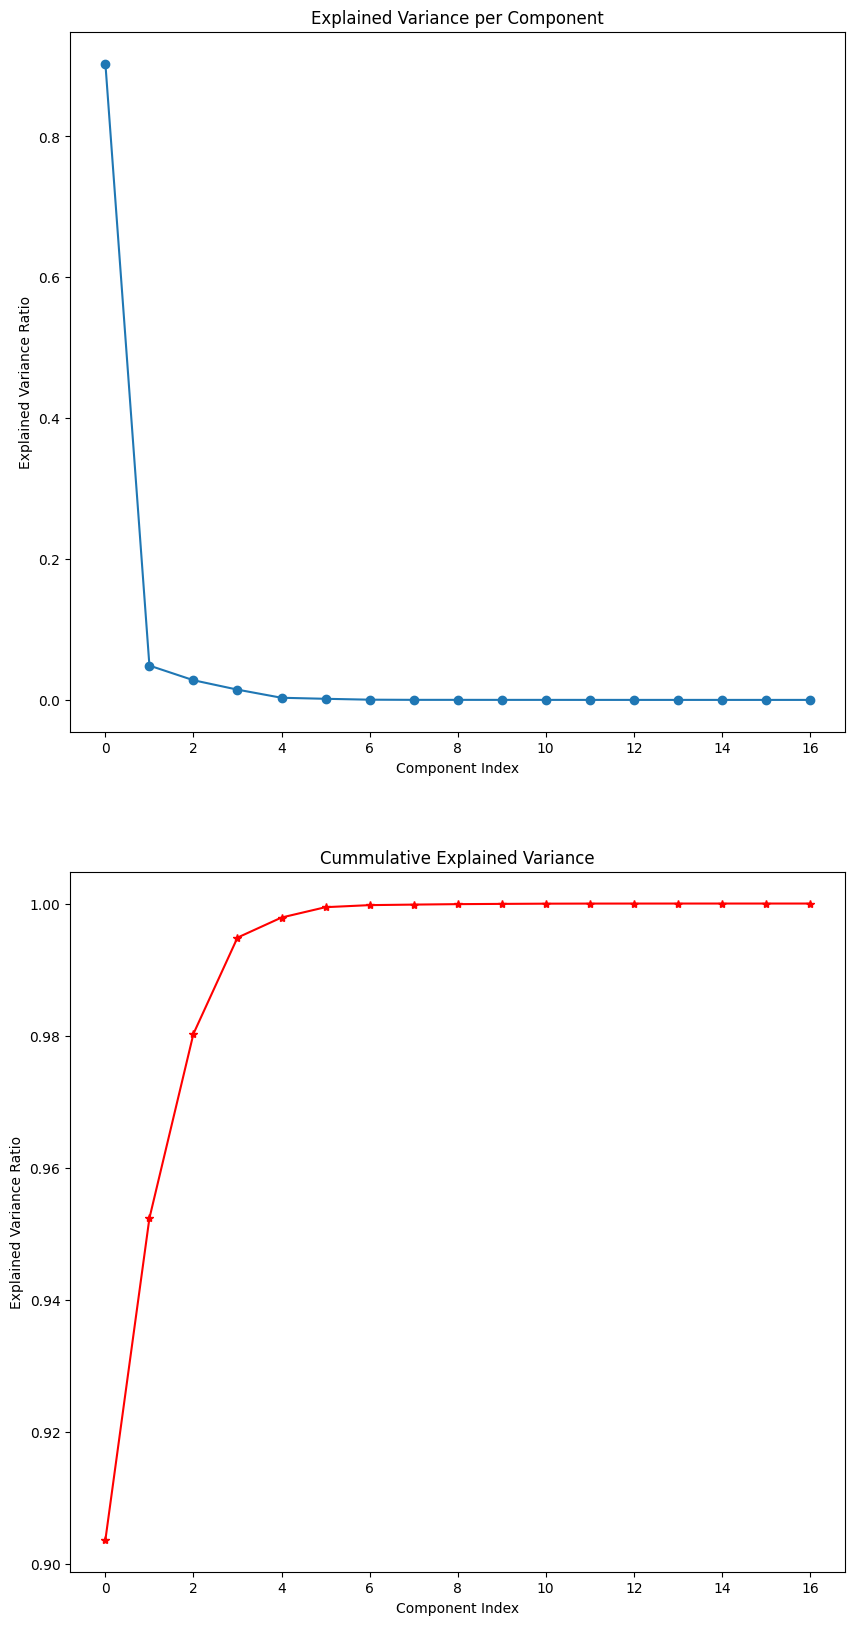

<Figure size 640x480 with 0 Axes>

In [ ]:

# Investigate the variance accounted for by each principal component.
plt.figure(figsize=(10,20))
plt.subplot(211)
plt.plot(doxPlgaPca.explained_variance_ratio_, marker = 'o')
plt.ylabel("Explained Variance Ratio")
plt.xlabel("Component Index")
#plt.xlim(0,10)
plt.title("Explained Variance per Component")
plt.subplot(212)
plt.plot(doxPlgaPca.explained_variance_ratio_.cumsum(), marker = '*', color = 'r')
plt.ylabel("Explained Variance Ratio")
plt.xlabel("Component Index")
#plt.xlim(0,10)
plt.title("Cummulative Explained Variance")
plt.show()

plt.savefig("pcaDoxPlga.svg")

In [ ]:
#apply PCA to the data.
from sklearn.decomposition import PCA

untPca = PCA(random_state = 77)
untPca.fit(untreatedDataClean)

feature_names = [f'feature_{i}' for i in range(untreatedDataClean.shape[1])]
untPca_df = pd.DataFrame(untPca.components_, columns=feature_names)
untPca_df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16
0,0.683141,0.607371,0.325910,0.192690,0.000537,0.000175,0.014009,0.001076,0.010382,0.022706,0.036312,0.003014,0.022403,0.115725,0.015045,0.053951,0.043499
1,-0.693336,0.586859,0.244036,0.296254,0.000093,0.000077,-0.003281,0.000689,0.030011,-0.003413,0.018910,-0.002175,-0.029507,-0.157753,0.005043,-0.011267,-0.019155
2,-0.039978,0.186446,0.357438,-0.883306,-0.000401,-0.000050,-0.012008,-0.000267,0.009314,-0.023086,-0.000509,-0.002900,-0.041096,-0.215489,-0.003960,-0.061011,-0.054881
3,-0.221406,0.054400,0.078507,-0.198868,0.000184,0.000050,0.060684,0.000473,-0.027453,0.129951,-0.017334,0.001545,0.146752,0.829209,0.010975,0.305598,0.279369
4,-0.019848,-0.486838,0.824401,0.233957,-0.001526,-0.000379,-0.000405,-0.002977,-0.013275,0.031969,-0.137764,-0.011810,-0.015466,-0.036730,-0.031881,0.052831,0.049984
5,0.028804,-0.031673,-0.069401,-0.013331,-0.000405,0.000006,0.087136,0.000538,0.201600,0.281936,0.258157,-0.012236,-0.098272,-0.400891,-0.036415,0.634328,0.473904
6,-0.026580,-0.098289,0.123475,0.019729,0.000717,0.000229,-0.010170,0.002769,0.084087,-0.067899,0.944191,0.031335,0.018826,0.133951,-0.008211,-0.194167,-0.116876
7,-0.006388,-0.000487,0.010002,0.003774,-0.000038,-0.000017,-0.020446,-0.006345,-0.824550,-0.194269,0.127556,0.098966,0.177166,-0.130756,0.373683,0.259655,0.012393
8,-0.001916,-0.032180,0.020969,-0.001600,0.015184,0.004849,-0.066781,0.042711,0.495960,-0.380267,-0.048158,0.019249,0.133208,0.022099,0.639972,0.313733,-0.269231
9,-0.001931,-0.015469,0.005299,0.001588,0.008710,0.004096,0.377118,0.016391,0.010955,0.495348,-0.015244,0.057441,-0.133908,-0.006600,0.626016,-0.401307,0.192893


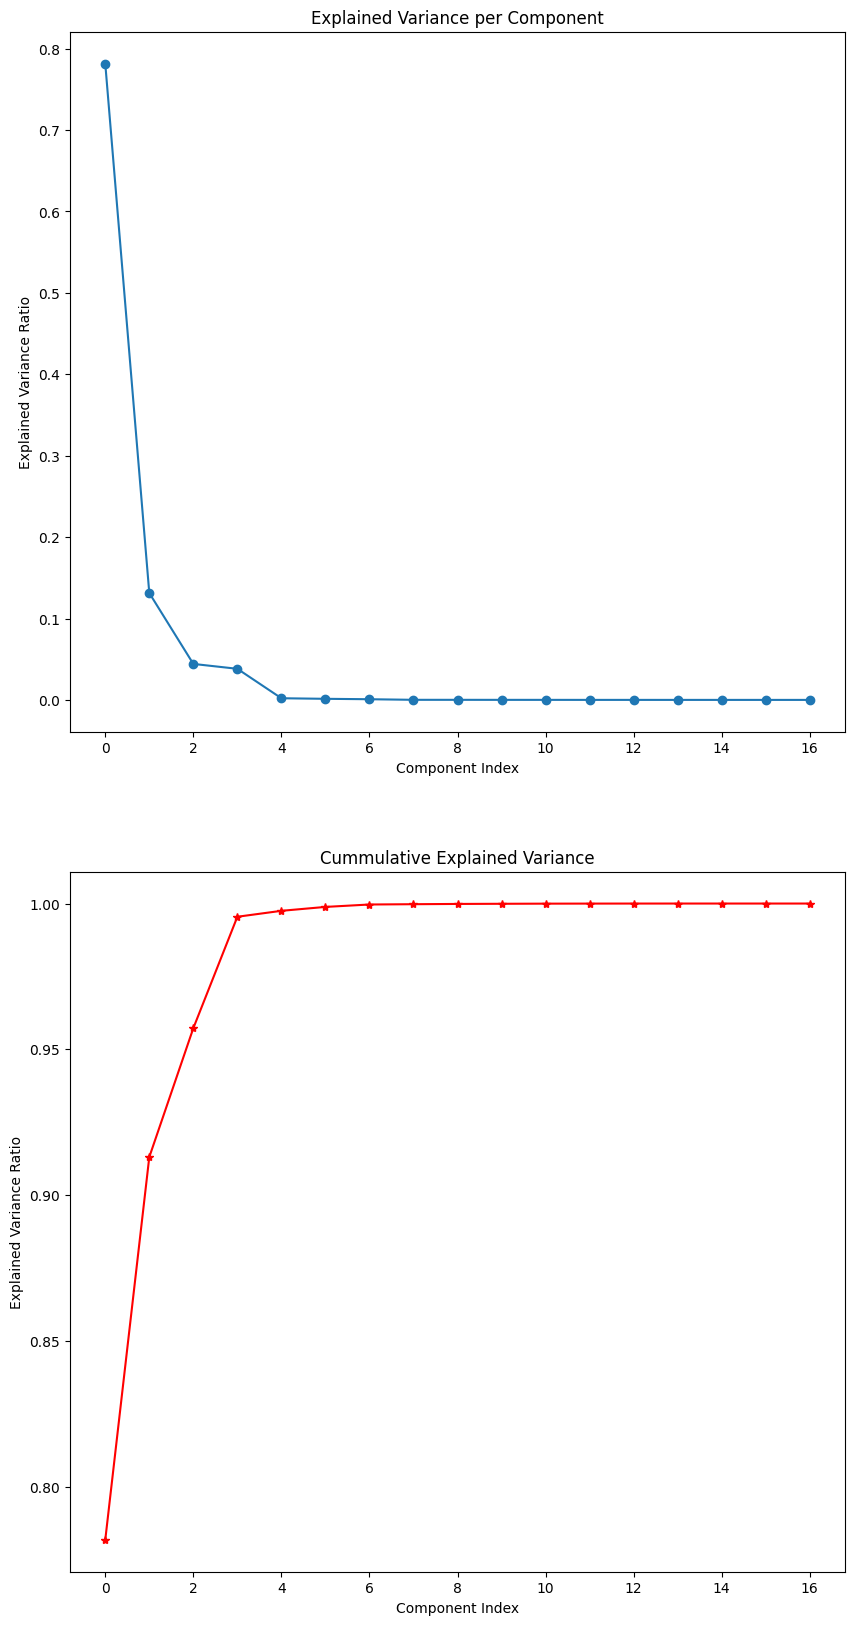

<Figure size 640x480 with 0 Axes>

In [ ]:

# Investigate the variance accounted for by each principal component.
plt.figure(figsize=(10,20))
plt.subplot(211)
plt.plot(untPca.explained_variance_ratio_, marker = 'o')
plt.ylabel("Explained Variance Ratio")
plt.xlabel("Component Index")
#plt.xlim(0,10)
plt.title("Explained Variance per Component")
plt.subplot(212)
plt.plot(untPca.explained_variance_ratio_.cumsum(), marker = '*', color = 'r')
plt.ylabel("Explained Variance Ratio")
plt.xlabel("Component Index")
#plt.xlim(0,10)
plt.title("Cummulative Explained Variance")
plt.show()

plt.savefig("pcaUnt.svg")

**Blue Graph**: For each component, as we move up the indices, the components will contribute less and less to the reconstruction of the original dataset that is why the first component always has the most explained variance until the last component will not add much to it. As the graph shows, at one component, the variance significantly drops to ~0.15 and only decreases from there.

**Red Graph**: The cumulative variance: As we move up the indices/increase, the graph shows the amount of components needed to get the most amount % of variance. As the graph shows, we need approximately 3 components to get most of the variance at around 99%.

In [ ]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.
def map_component_to_features(component, df):
    x = dict(zip(df.columns, component.round(4)))
    y = dict(sorted(x.items(), key=lambda item: abs(item[1]), reverse = True))
    return pd.Series(y)

Finding the feature weights for each data set on the first component

Feature weights on the Dox only data set's PCA

In [ ]:
first_component_features = map_component_to_features(doxPca.components_[0], doxClean)
print("Features with highest weights:\n",first_component_features[:])
print("Feature with lowest weight:\n",first_component_features[-2:-1])

Features with highest weights:
 SSC-A                  0.6947
PerPCy55-B-695/40-A    0.4155
SSC-H                  0.3233
FSC-A                  0.2842
PE-YG-585/15-A         0.2686
SSC-W                  0.2387
PE CY5-YG-680/42-A     0.1571
BV605-610/20-A         0.0609
BUV395-A               0.0261
BV711-V-760/50-A       0.0217
PE-Cy7-YG-780/60-A     0.0196
BUV563-A               0.0146
PI-B-630/40-A          0.0115
APC-Cy7-R-780/60-A     0.0069
FITC-B-525/50-A        0.0037
APC-R-670/14-A         0.0027
PacBlue-V-450/50-A     0.0005
dtype: float64
Feature with lowest weight:
 APC-R-670/14-A    0.0027
dtype: float64


Feature weights on the Dox and PLGA data set's PCA

In [ ]:
first_component_features = map_component_to_features(doxPlgaPca.components_[0], doxPlgaClean)
print("Features with highest weights:\n",first_component_features[:])
print("Feature with lowest weight:\n",first_component_features[-2:-1])

Features with highest weights:
 SSC-A                  0.7125
SSC-H                  0.3618
PerPCy55-B-695/40-A    0.3422
FSC-A                  0.2979
SSC-W                  0.2821
PE-YG-585/15-A         0.2456
PE CY5-YG-680/42-A     0.1138
BUV395-A               0.0335
BV605-610/20-A         0.0308
BV711-V-760/50-A       0.0158
PE-Cy7-YG-780/60-A     0.0126
PI-B-630/40-A          0.0105
BUV563-A               0.0103
FITC-B-525/50-A        0.0039
APC-R-670/14-A         0.0017
APC-Cy7-R-780/60-A     0.0014
PacBlue-V-450/50-A     0.0008
dtype: float64
Feature with lowest weight:
 APC-Cy7-R-780/60-A    0.0014
dtype: float64


Feature weights on the untreated data set's PCA

In [ ]:
first_component_features = map_component_to_features(untPca.components_[0], untreatedDataClean)
print("Features with highest weights:\n",first_component_features[:])
print("Feature with lowest weight:\n",first_component_features[-2:-1])

Features with highest weights:
 FSC-A                  0.6831
SSC-A                  0.6074
SSC-H                  0.3259
SSC-W                  0.1927
APC-Cy7-R-780/60-A     0.1157
PE CY5-YG-680/42-A     0.0540
PE-Cy7-YG-780/60-A     0.0435
BUV395-A               0.0363
BV711-V-760/50-A       0.0227
APC-R-670/14-A         0.0224
PE-YG-585/15-A         0.0150
PerPCy55-B-695/40-A    0.0140
BV605-610/20-A         0.0104
BUV563-A               0.0030
PacBlue-V-450/50-A     0.0011
FITC-B-525/50-A        0.0005
PI-B-630/40-A          0.0002
dtype: float64
Feature with lowest weight:
 FITC-B-525/50-A    0.0005
dtype: float64


After calculating and viewing the weights on each feature from the original dataset, we notice that a few of the features that have the highest weight are SSC-A, SSC-H, SSC-W, and FSC-A. PerPCy55-B-695/40-A is also another feature that tends to be one of the heavier weighted features. In biological context, the amount that a cell scatters light and the forward and side measure of this are the most distinguishing factors in determining what cell you are looking at. Side scatter in area, width, or height tended to be more weighted than forward scatter as granularity and intracellular components were more distinguishing than forward scatter which just tells us the size of the cell.

##Performing sci-kit feature selection on the dataset

In [ ]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_new = selector.fit_transform(doxClean)

selected_features_indices = selector.get_support(indices=True)
selected_features_names = [feature_names[i] for i in selected_features_indices]

print("Selected features using VarianceThreshold:")
print(selected_features_names)

Selected features using VarianceThreshold:
['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16']


By using variance threshold selection, all of the 17 features were picked, indicating that they all have high enough variance

#Combining the three classes

Adding a new column to each dataframe to label them/hold the class



In [ ]:
doxClean["Class"]=0
doxPlgaClean["Class"]=1
untreatedDataClean["Class"]=2
untreatedDataClean

,FSC-A,SSC-A,SSC-H,SSC-W,FITC-B-525/50-A,PI-B-630/40-A,PerPCy55-B-695/40-A,PacBlue-V-450/50-A,BV605-610/20-A,BV711-V-760/50-A,BUV395-A,BUV563-A,APC-R-670/14-A,APC-Cy7-R-780/60-A,PE-YG-585/15-A,PE CY5-YG-680/42-A,PE-Cy7-YG-780/60-A,Class
0,75628.805,40647.0,28365.0,93912.990,49.0,-15.0,972.0,122.980000,433.44000,1461.14,2115.6199,230.72000,1872.48,7636.560,633.58000,4141.97000,2255.45000,2
1,93764.000,56723.0,37897.0,98092.164,75.0,2.0,1904.0,98.040000,490.20000,3549.22,3064.2500,269.86000,3883.14,22027.959,1800.41000,7486.04000,5788.33000,2
2,95770.400,44133.0,27322.0,105859.760,59.0,24.0,663.0,87.720000,389.58002,445.48,2398.8699,271.91998,852.58,3350.160,1047.54000,1259.26000,718.90000,2
3,65863.200,47457.0,33194.0,93695.910,46.0,-30.0,638.0,105.780000,438.60000,935.68,1719.0700,385.22000,1003.92,4198.980,1045.17000,1830.43000,1395.93000,2
4,86016.805,32172.0,21128.0,99792.900,45.0,0.0,226.0,28.380001,301.86002,136.74,1826.1900,210.12000,315.84,895.820,433.71002,242.53001,324.69000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439995,108812.000,103961.0,57732.0,118014.070,74.0,55.0,906.0,194.360000,2857.78000,820.44,5878.2100,248.23000,446.50,1787.880,2507.46000,2642.55000,819.23004,2
439996,46876.000,38296.0,25985.0,96585.210,30.0,35.0,778.0,140.180010,1351.06000,1137.78,1256.6000,98.88000,578.10,3326.660,1467.03000,2683.63010,2206.47000,2
439997,69824.805,73155.0,48014.0,99851.836,95.0,22.0,613.0,144.480000,2516.36000,1216.90,2245.4000,175.09999,727.56,2803.080,1538.13000,3443.61000,1657.42000,2
439998,56900.800,92426.0,55309.0,109516.180,46.0,2.0,762.0,168.560000,2480.24000,881.50,2062.0600,97.85000,657.06,2699.680,1884.94010,2698.64010,1892.05000,2


Appending the dataframes to make one big dataset

In [ ]:
theData = doxClean.copy() #grabbing the dox data
theData = pd.concat([theData, doxPlgaClean], ignore_index=True) #appending plga data
theData = pd.concat([theData, untreatedDataClean], ignore_index=True) #appending untreated data
theData

,FSC-A,SSC-A,SSC-H,SSC-W,FITC-B-525/50-A,PI-B-630/40-A,PerPCy55-B-695/40-A,PacBlue-V-450/50-A,BV605-610/20-A,BV711-V-760/50-A,BUV395-A,BUV563-A,APC-R-670/14-A,APC-Cy7-R-780/60-A,PE-YG-585/15-A,PE CY5-YG-680/42-A,PE-Cy7-YG-780/60-A,Class
0,88348.805,137055.0,67957.0,132172.340,922.0,3420.0,123403.0,-44.720000,23998.3000,6448.28030,7548.86960,4647.36000,658.00,684.3200,82228.7340,55009.2800,6312.890000,0
1,42336.800,120825.0,70852.0,111759.540,406.0,1794.0,66607.0,28.380001,12288.5400,3054.72000,3441.23000,2594.56980,323.36,320.5400,30238.0410,19906.4200,2306.010000,0
2,9516.000,4668.0,4289.0,71327.130,-5.0,-7.0,918.0,-41.280000,93.7400,163.40001,483.06998,140.08000,-2.82,5.6400,718.9000,225.9400,83.740005,0
3,9996.000,65732.0,41216.0,104517.960,297.0,748.0,23998.0,496.220000,6378.6200,625.22003,2576.03000,1472.89990,392.92,1101.6800,19116.4200,8645.7600,1293.230000,0
4,20627.201,90787.0,38805.0,153326.050,333.0,1161.0,42163.0,287.240000,9036.0205,3065.04000,4040.69000,2364.88000,1918.54,7210.7397,25474.3400,18601.3400,4255.730000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089760,108812.000,103961.0,57732.0,118014.070,74.0,55.0,906.0,194.360000,2857.7800,820.44000,5878.21000,248.23000,446.50,1787.8800,2507.4600,2642.5500,819.230040,2
1089761,46876.000,38296.0,25985.0,96585.210,30.0,35.0,778.0,140.180010,1351.0600,1137.78000,1256.60000,98.88000,578.10,3326.6600,1467.0300,2683.6301,2206.470000,2
1089762,69824.805,73155.0,48014.0,99851.836,95.0,22.0,613.0,144.480000,2516.3600,1216.90000,2245.40000,175.09999,727.56,2803.0800,1538.1300,3443.6100,1657.420000,2
1089763,56900.800,92426.0,55309.0,109516.180,46.0,2.0,762.0,168.560000,2480.2400,881.50000,2062.06000,97.85000,657.06,2699.6800,1884.9401,2698.6401,1892.050000,2


0 = Dox
1 = Dox and PLGA
2 = Untreated

Creating the dataset with our original features and removing
- PI-B-630/40-A
- PE-Cy7-YG-780/60-A
- PE CY5-YG-680/42-A
- PE-YG-585/15-A
- APC-Cy7-R-780/60-A
- BUV563-A-

In [ ]:
toDrop = ["PI-B-630/40-A", "PE-Cy7-YG-780/60-A", "PE CY5-YG-680/42-A", "PE-YG-585/15-A", "APC-Cy7-R-780/60-A", "BUV563-A"]

ogFeatures = theData.copy() #copy theData dataframe
ogFeatures=ogFeatures.drop(columns=toDrop) #dropping the unnecessary features
ogFeatures

,FSC-A,SSC-A,SSC-H,SSC-W,FITC-B-525/50-A,PerPCy55-B-695/40-A,PacBlue-V-450/50-A,BV605-610/20-A,BV711-V-760/50-A,BUV395-A,APC-R-670/14-A,Class
0,88348.805,137055.0,67957.0,132172.340,922.0,123403.0,-44.720000,23998.3000,6448.28030,7548.86960,658.00,0
1,42336.800,120825.0,70852.0,111759.540,406.0,66607.0,28.380001,12288.5400,3054.72000,3441.23000,323.36,0
2,9516.000,4668.0,4289.0,71327.130,-5.0,918.0,-41.280000,93.7400,163.40001,483.06998,-2.82,0
3,9996.000,65732.0,41216.0,104517.960,297.0,23998.0,496.220000,6378.6200,625.22003,2576.03000,392.92,0
4,20627.201,90787.0,38805.0,153326.050,333.0,42163.0,287.240000,9036.0205,3065.04000,4040.69000,1918.54,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1089760,108812.000,103961.0,57732.0,118014.070,74.0,906.0,194.360000,2857.7800,820.44000,5878.21000,446.50,2
1089761,46876.000,38296.0,25985.0,96585.210,30.0,778.0,140.180010,1351.0600,1137.78000,1256.60000,578.10,2
1089762,69824.805,73155.0,48014.0,99851.836,95.0,613.0,144.480000,2516.3600,1216.90000,2245.40000,727.56,2
1089763,56900.800,92426.0,55309.0,109516.180,46.0,762.0,168.560000,2480.2400,881.50000,2062.06000,657.06,2


##Applying PCA to the new dataset with all three classes

In [ ]:
#apply PCA to the data.
from sklearn.decomposition import PCA

theData1 = theData.copy()
labels=theData1["Class"]
theData1 = theData1.drop(columns="Class")

fullPca= PCA(random_state = 77)
fullPca.fit(theData1)

# Transform the data using PCA
theData1_pca = fullPca.transform(theData1)

feature_names = [f'feature_{i}' for i in range(4)]
fullPca_df = pd.DataFrame(theData1_pca[:,:4], columns=feature_names)
fullPca_df

,feature_0,feature_1,feature_2,feature_3
0,128340.581892,-43382.786534,58355.019230,-27330.321078
1,59704.631997,-34484.042591,-696.563864,9989.596778
2,-100862.663567,-18598.955160,6837.482099,2687.953169
3,-21650.554504,-35174.605744,-16143.548693,1485.434860
4,21004.655670,-36616.480584,-28548.595892,-39097.697369
...,...,...,...,...
1089760,32730.310767,61039.029745,-13028.773501,3122.187557
1089761,-50450.267966,12064.933604,-2408.953710,-4176.442878
1089762,-9790.659772,30182.816976,-9696.889161,9661.547907
1089763,4890.724732,19570.413703,-28353.942171,11794.577444


PCA took all 1.8 million records, and the 17 original features and created 4 new features using a combination of the old features in order to decrease complexity. This dataframe shows the 4 features with 1.8 million records and the transformed data using these 4 features.

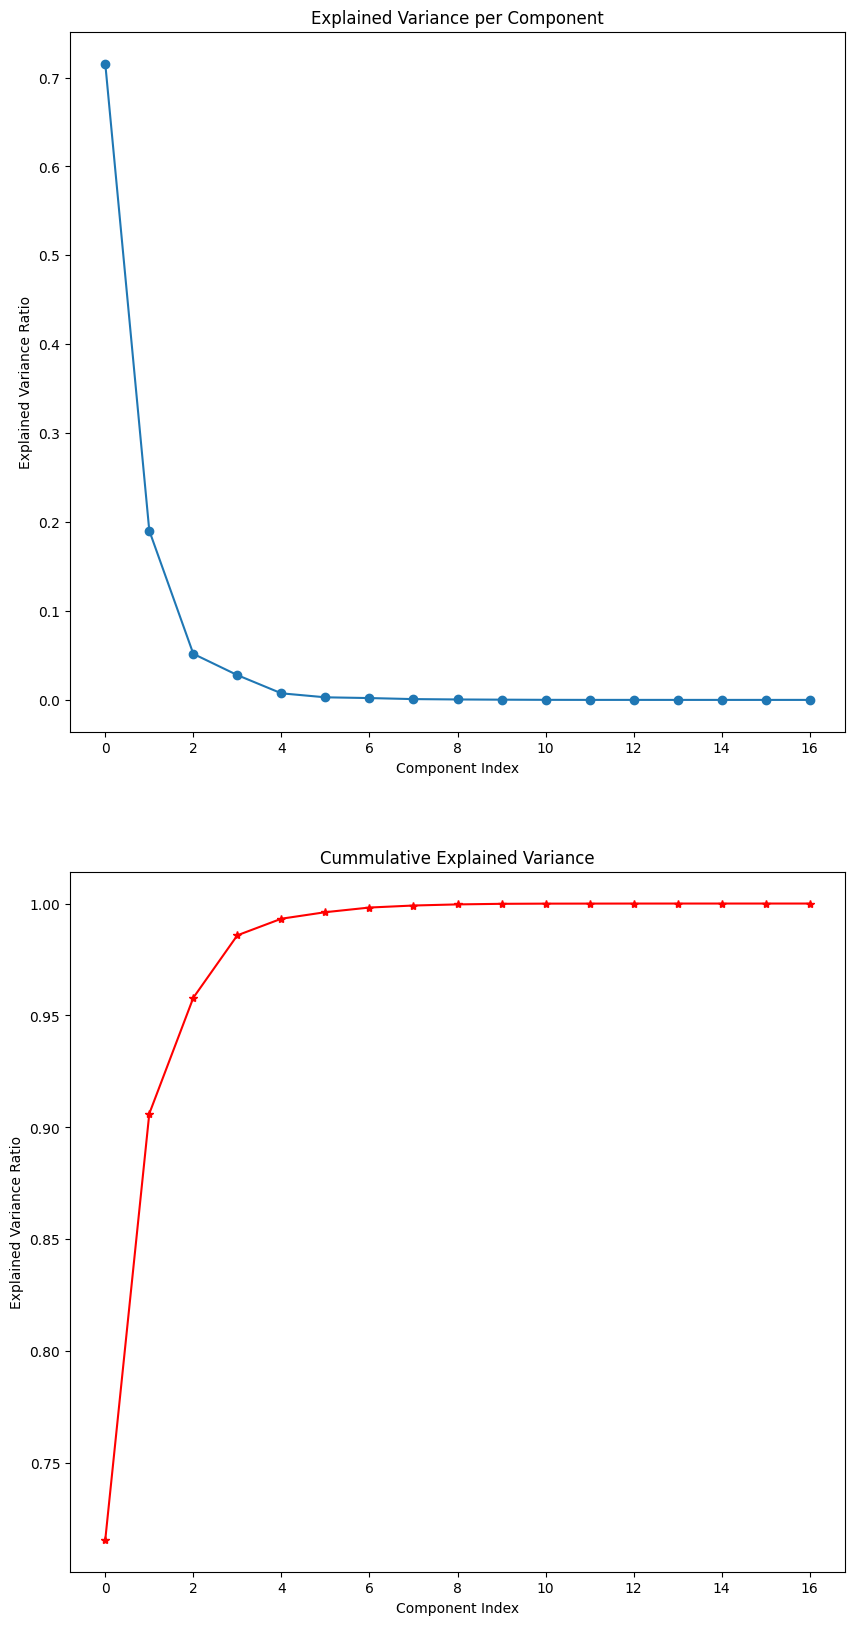

<Figure size 640x480 with 0 Axes>

In [ ]:
# Investigate the variance accounted for by each principal component.
plt.figure(figsize=(10,20))
plt.subplot(211)
plt.plot(fullPca.explained_variance_ratio_, marker = 'o')
plt.ylabel("Explained Variance Ratio")
plt.xlabel("Component Index")
#plt.xlim(0,10)
plt.title("Explained Variance per Component")
plt.subplot(212)
plt.plot(fullPca.explained_variance_ratio_.cumsum(), marker = '*', color = 'r')
plt.ylabel("Explained Variance Ratio")
plt.xlabel("Component Index")
#plt.xlim(0,10)
plt.title("Cummulative Explained Variance")
plt.show()

plt.savefig("pcaFull.svg")

Explained variance in terms of machine learning measures the proportion of variability of predictions and is the difference between the predictions and actual values. It indicates the dispersion of errors in a dataset, and a ratio closer to 1 is more desired as they indicate better squares of standard deviation.

When performing PCA fitting on the full set of data, the graph showing Explained variance per component(top) describes how much each feature contributes to the overall variance. The graph shows that after 2 of the original features, the less that each feature has on the cummulative explained variance ratio, for which the closer to 1 the better. This means that theoretically we are able to use less features as the variance contribution of each feature goes from about .7 to .05 after using just 2 features. The Cummulative explained variance graph (bottom) shows that the explained variance reached close to 100 percent, higher is preferable, at about 3 to 4 features. This means that using the 17 original features or close to it would most likely not be necessary.

In [ ]:
first_component_features = map_component_to_features(fullPca.components_[0], theData)
print("Features with highest weights:\n",first_component_features[:])
print("Feature with lowest weight:\n",first_component_features[-2:-1])

Features with highest weights:
 SSC-A                  0.7105
PerPCy55-B-695/40-A    0.3571
SSC-H                  0.3496
FSC-A                  0.3147
SSC-W                  0.2572
PE-YG-585/15-A         0.2375
PE CY5-YG-680/42-A     0.1382
BV605-610/20-A         0.0496
BUV395-A               0.0280
PE-Cy7-YG-780/60-A     0.0217
BV711-V-760/50-A       0.0211
APC-Cy7-R-780/60-A     0.0186
BUV563-A               0.0124
PI-B-630/40-A          0.0101
APC-R-670/14-A         0.0049
FITC-B-525/50-A        0.0034
PacBlue-V-450/50-A     0.0008
dtype: float64
Feature with lowest weight:
 FITC-B-525/50-A    0.0034
dtype: float64


Looking at the weights of the original features on the PCA's dataset, the features that had the highest weights were SSC-A, PerPCy55-B-695/40-A, SSC-H, FSC-A. SSC-A and SSC-H are indicative of the cells granularity and thus make sense that this data would be a distinguishing factor for the model when it is making decisions. FSC-A tells us sizes of cells, so this also makes sense that it would distinguish between cells of different sizes.

#Splitting the data into three types of feature engineered sets

We are training three different sets of feature data
- one consisting of the features created by PCA
- one consisting of the original set but removing unnecessary features that could be determined by other features
- one data set containing the full original 17 features.

In [ ]:
#splitting the data into three sets for each
from sklearn.model_selection import train_test_split


dropClass = ["Class"]
ogFeatures = ogFeatures.drop(columns=dropClass)

#sets for the PCA
XtrainvalP, XtestP, ytrainvalP, ytestP = train_test_split(fullPca_df,labels,test_size=0.2, random_state = 42)
XtrainP, XvalP, ytrainP, yvalP = train_test_split(XtrainvalP, ytrainvalP, test_size = 0.2, random_state=42)

#sets for the Og-feature
XtrainvalO, XtestO, ytrainvalO, ytestO = train_test_split(ogFeatures,labels,test_size=0.2, random_state = 42)
XtrainO, XvalO, ytrainO, yvalO = train_test_split(XtrainvalO, ytrainvalO, test_size = 0.2, random_state=42)

#sets for the full
XtrainvalF, XtestF, ytrainvalF, ytestF = train_test_split(theData1,labels,test_size=0.2, random_state = 42)
XtrainF, XvalF, ytrainF, yvalF = train_test_split(XtrainvalF, ytrainvalF, test_size = 0.2, random_state=42)

#Basic Random Forest models

Running a random forest classifier model without finetuned hyperparameters

**PCA data set**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#random forest for training data and PCA features
clf = RandomForestClassifier(n_estimators=10, random_state=42)
clf.fit(XtrainP, ytrainP)

clf.score(XtrainP, ytrainP)

0.9895189469050784

In [ ]:
clf.score(XvalP, yvalP)

0.8236953940916364

When getting the accuracy from a random forest classifier on the test data from the PCA generated features, the accuracy came to 83.37% accuracy. This accuracy is less than a classifier trained using features from the original set, which indicates that the PCA features may be less efficient.

**Modified original data set**

In [ ]:
clfOg = RandomForestClassifier(n_estimators=10, random_state=42)
clfOg.fit(XtrainO, ytrainO)

clfOg.score(XtrainO, ytrainO)

0.9980256620914217

In [ ]:
clfOg.score(XvalO, yvalO)

0.9485269237166142

When evaluating on the testing data, the model received about a 95 percent accuracy which is what we were hoping to get on a classifier

**Full data set**

In [ ]:
clfF = RandomForestClassifier(n_estimators=10, random_state=42)
clfF.fit(XtrainF, ytrainF)

clfF.score(XtrainF, ytrainF)

0.9986751719480564

In [ ]:
clfF.score(XvalF, yvalF)

0.9594122606286885

The accuracy from the model trained on the original 17 features received an accuracy of about 96 percent.

#Randomized Search Random Forests

In order to get the best hyperparameters, we finetuned them utilizing randomized search.

**Randomized Search on the PCA**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

param_distribs = {'n_estimators': randint(low=10, high=200), #number of trees
                  'max_features': randint(low=1, high=13),
                  'max_depth': randint(low=2, high=12),
                  'min_samples_split': randint(low=2, high=200),  #min number of samples required to split a node
                  'min_samples_leaf': randint(low=1, high=100)}  #min number of samples required to be at a leaf node}

rnd_search = RandomizedSearchCV(
    estimator=rf, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='accuracy', random_state=42)

rnd_search.fit(XtrainvalP, ytrainvalP)
print(rnd_search.cv_results_)
print(rnd_search.best_estimator_)
print(rnd_search.best_score_)

{'mean_fit_time': array([126.81876381, 121.73193828, 139.63928803,  22.25770283,
        32.00708214,  68.19920301, 280.04377755,  80.29484606,
        50.21170402,  37.58562462]), 'std_fit_time': array([1.50434181, 4.19106549, 1.59802186, 0.16826046, 0.23917534,
       1.00445358, 8.38105379, 0.77607707, 0.19152007, 0.68656622]), 'mean_score_time': array([1.5768346 , 1.48962132, 1.89531708, 0.56988565, 0.57412267,
       0.88140758, 3.29725067, 1.32324227, 0.90240049, 0.899671  ]), 'std_score_time': array([0.04101531, 0.00832594, 0.00898195, 0.00595338, 0.01600322,
       0.01628329, 0.0554512 , 0.07462171, 0.01576817, 0.01078339]), 'param_max_depth': masked_array(data=[8, 9, 6, 6, 3, 7, 11, 4, 6, 8],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'param_max_features': masked_array(data=[4, 5, 4, 2, 12, 12, 12, 12, 3, 2],
             mask=[False, False, False, False, False,

The best classifier on the PCA dataset was:
RandomForestClassifier(max_depth=11, max_features=12, min_samples_leaf=60,
                       min_samples_split=16, n_estimators=199, random_state=42)

The percent accuracy that the classifier achieved was 82.5 percent.

In [ ]:
bestrfF = RandomForestClassifier(max_depth=11, max_features=12, min_samples_leaf=60, min_samples_split=16, n_estimators=199, random_state=42)
bestrfF.fit(XtrainvalP, ytrainvalP) #train this model on the full training set

bestrfF.score(XtestP, ytestP) #evaluate on the test data

0.8126476809220337

When testing this best classifer on the test data, the accuracy acheived was about 81 percent, which is significantly lower than the models trained on more and of the original features.

**Using randomized search on the og dataset, with 11 features**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

param_distribs = {'n_estimators': randint(low=10, high=200), #number of trees
                  'max_features': randint(low=1, high=13),
                  'max_depth': randint(low=2, high=12),
                  'min_samples_split': randint(low=2, high=200),  #min number of samples required to split a node
                  'min_samples_leaf': randint(low=1, high=100)}  #min number of samples required to be at a leaf node}

rnd_search = RandomizedSearchCV(
    estimator=rf, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='accuracy', random_state=42)

rnd_search.fit(XtrainvalO, ytrainvalO)
print(rnd_search.cv_results_)
print(rnd_search.best_estimator_)
print(rnd_search.best_score_)

{'mean_fit_time': array([ 99.70872839, 117.48096061, 107.75227165,  17.18788981,
        61.22013219, 139.65777771, 607.0164396 , 164.90364361,
        42.32852689,  32.19694471]), 'std_fit_time': array([ 0.07874395,  1.13693019,  0.58904884,  0.15054124,  0.52010319,
        0.795003  , 13.87892827,  0.41455494,  0.14125173,  0.05949683]), 'mean_score_time': array([1.42321603, 1.320388  , 1.71187433, 0.52912593, 0.57953167,
       0.83200995, 2.94990857, 1.32188972, 0.88166873, 0.89306116]), 'std_score_time': array([0.00679313, 0.01948978, 0.02642629, 0.00946466, 0.0021521 ,
       0.04114031, 0.0304756 , 0.03069609, 0.01734228, 0.01067998]), 'param_max_depth': masked_array(data=[8, 9, 6, 6, 3, 7, 11, 4, 6, 8],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'param_max_features': masked_array(data=[4, 5, 4, 2, 12, 12, 12, 12, 3, 2],
             mask=[False, False, False, Fal

The best estimator that was found by the randomized search was: RandomForestClassifier(max_depth=11, max_features=12, min_samples_leaf=60,
                       min_samples_split=16, n_estimators=199, random_state=42)

The accuracy that this model got was about 94 percent.

Utilizing the best classifier found on the testing data

In [ ]:

bestrfO = RandomForestClassifier(max_depth=11, max_features=12, min_samples_leaf=60,
                       min_samples_split=16, n_estimators=199, random_state=42)
bestrfO.fit(XtrainvalO, ytrainvalO) #train this model on the training and validation data

bestrfO.score(XtestO, ytestO) #evaluate on the test data

0.9363486623262813

The test accuracy from the best classifier found using randomized search was about 94 percent.

**Randomized search on the full dataset**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

param_distribs = {'n_estimators': randint(low=10, high=200), #number of trees
                  'max_features': randint(low=1, high=13),
                  'max_depth': randint(low=2, high=12),
                  'min_samples_split': randint(low=2, high=200),  #min number of samples required to split a node
                  'min_samples_leaf': randint(low=1, high=100)}  #min number of samples required to be at a leaf node}

rnd_search = RandomizedSearchCV(
    estimator=rf, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='accuracy', random_state=42)

rnd_search.fit(XtrainvalF, ytrainvalF)
print(rnd_search.cv_results_)
print(rnd_search.best_estimator_)
print(rnd_search.best_score_)

{'mean_fit_time': array([104.74413196, 117.94535303, 108.43354535,  17.76919095,
        63.83642697, 144.98408874, 628.1876634 , 171.89753509,
        41.04737004,  31.18659226]), 'std_fit_time': array([1.22936105, 1.83727258, 0.67432705, 0.066112  , 1.93787447,
       1.12409937, 4.21162937, 0.55359774, 0.31202673, 0.05704744]), 'mean_score_time': array([1.65080102, 1.39020292, 1.80538774, 0.55031435, 0.58494846,
       0.84888411, 3.01726866, 1.31589905, 0.91003903, 0.89561224]), 'std_score_time': array([0.1356556 , 0.02469067, 0.06665458, 0.00207346, 0.00225861,
       0.037766  , 0.05977704, 0.01927077, 0.01318939, 0.00865041]), 'param_max_depth': masked_array(data=[8, 9, 6, 6, 3, 7, 11, 4, 6, 8],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'param_max_features': masked_array(data=[4, 5, 4, 2, 12, 12, 12, 12, 3, 2],
             mask=[False, False, False, False, False,

The classifier that performed the best in terms of accuracy was:
RandomForestClassifier(max_depth=11, max_features=12, min_samples_leaf=60,
                       min_samples_split=16, n_estimators=199, random_state=42)

It's accuracy was about 95 percent.

Creating the classifer using the best hyperparamters from the randomized search for the full feature set

In [ ]:
bestrfF = RandomForestClassifier(max_depth=11, max_features=12, min_samples_leaf=60, min_samples_split=16, n_estimators=199, random_state=42)
bestrfF.fit(XtrainvalF, ytrainvalF) #train this model on the full training set

bestrfF.score(XtestF, ytestF) #evaluate on the test data

0.9470206879464839

The accuracy of the classifer when used on the testing data was about 95 percent.

#Calculating permutation importance per feature

##Best classifiers on Og and Full datasets

Calculating the permutation importance(PI) of each feature in our model on the Og data set

In [ ]:
from sklearn.ensemble import RandomForestClassifier

bestrfO = RandomForestClassifier(max_depth=11, max_features=12, min_samples_leaf=60, min_samples_split=16, n_estimators=199, random_state=42)
bestrfO.fit(XtrainvalO, ytrainvalO) #train this model on the full training set

KeyboardInterrupt: 

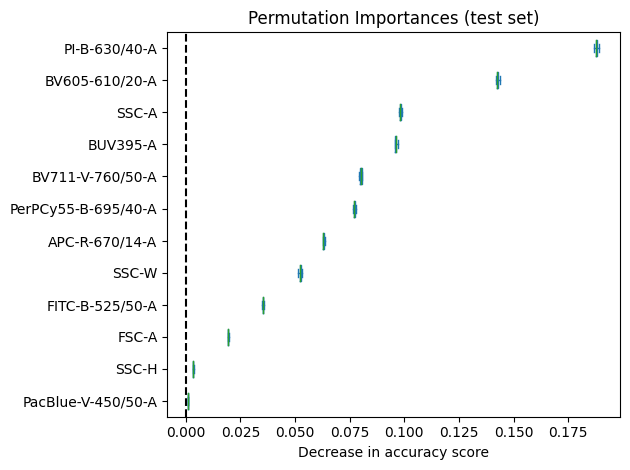

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

test_results = permutation_importance(
    bestrfO, XtestO, ytestO , n_repeats=10, random_state=42, n_jobs=2
)
sorted_importances_idx = test_results.importances_mean.argsort()

test_importances = pd.DataFrame(
    test_results.importances[sorted_importances_idx].T,
    columns=XtrainvalO.columns[sorted_importances_idx],
)


for name, importances in zip(["test"], [test_importances]):
    ax = importances.plot.box(vert=False, whis=10)
    ax.set_title(f"Permutation Importances ({name} set)")
    ax.set_xlabel("Decrease in accuracy score")
    ax.axvline(x=0, color="k", linestyle="--")
    ax.figure.tight_layout()

plt.savefig("PIOg.svg")

Calculating the PI of each feature in our model on the full data set

In [ ]:
bestrfF = RandomForestClassifier(max_depth=11, max_features=12, min_samples_leaf=60, min_samples_split=16, n_estimators=199, random_state=42)
bestrfF.fit(XtrainvalF, ytrainvalF) #train this model on the full training set

RandomForestClassifier(max_depth=11, max_features=12, min_samples_leaf=60,
                       min_samples_split=16, n_estimators=10, random_state=42)

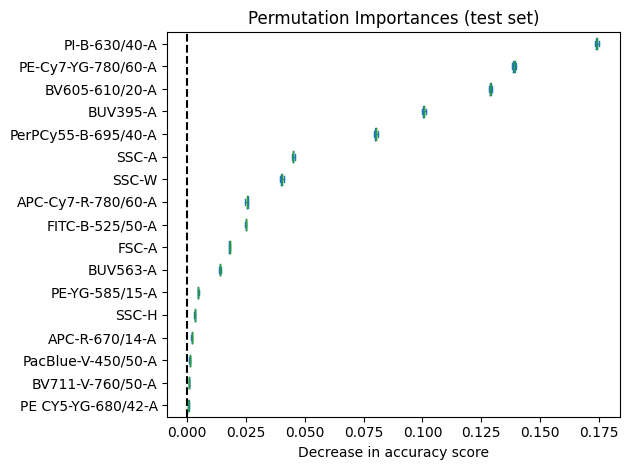

In [ ]:
from sklearn.inspection import permutation_importance


test_results = permutation_importance(
    bestrfF, XtestF, ytestF , n_repeats=10, random_state=42, n_jobs=2
)
sorted_importances_idx = test_results.importances_mean.argsort()

test_importances = pd.DataFrame(
    test_results.importances[sorted_importances_idx].T,
    columns=XtrainvalF.columns[sorted_importances_idx],
)


for name, importances in zip(["test"], [test_importances]):
    ax = importances.plot.box(vert=False, whis=10)
    ax.set_title(f"Permutation Importances ({name} set)")
    ax.set_xlabel("Decrease in accuracy score")
    ax.axvline(x=0, color="k", linestyle="--")
    ax.figure.tight_layout()

##Alternate random forests

Our classifiers were created using randomized search on each of the three datasets and the hyperparameters were kept the same. The only discrepancy may be the max_features hyperparameter per dataset thus

in order to confirm our classifer has both
1. satisfactory accuracy
2. accurate calculation of the permutated feature importance

we run 4 more versions of the trees with our hyperparameters and change the number of estimators. If we notice that none of the other random forests have as good or similar accuracy, we can be more sure that we have a good classifier and are able to confirm that the number of trees is important for the model.

If any of the versions of the trees have similar accuracy, we plot that model's permutation importance and ensure that our model's permutation importance showing high feature consistency is accurate.

###Full dataset

Same hyperparameters but with 10 estimators

In [ ]:
bestrfF_10 = RandomForestClassifier(max_depth=11, max_features=12, min_samples_leaf=60, min_samples_split=16, n_estimators=10, random_state=42)
bestrfF_10.fit(XtrainvalF, ytrainvalF) #train this model on the full training set

bestrfF_10.score(XtestF, ytestF) #evaluate on the test data

0.9465114038347717

Model accuracy satisfactory/similar to original model, so we run PI

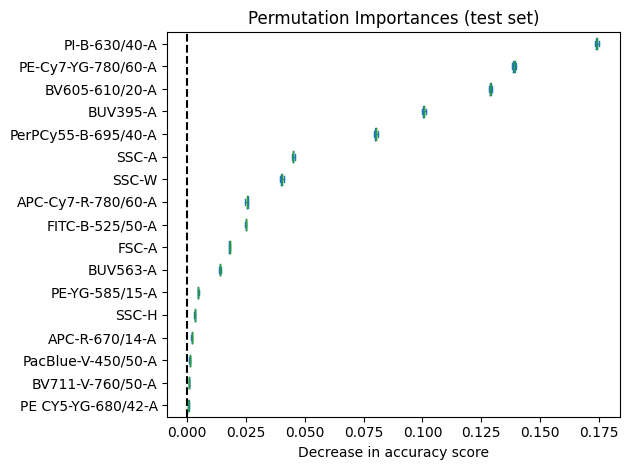

In [ ]:
from sklearn.inspection import permutation_importance


test_results = permutation_importance(
    bestrfF_10, XtestF, ytestF , n_repeats=10, random_state=42, n_jobs=2
)
sorted_importances_idx = test_results.importances_mean.argsort()

test_importances = pd.DataFrame(
    test_results.importances[sorted_importances_idx].T,
    columns=XtrainvalF.columns[sorted_importances_idx],
)


for name, importances in zip(["test"], [test_importances]):
    ax = importances.plot.box(vert=False, whis=10)
    ax.set_title(f"Permutation Importances ({name} set)")
    ax.set_xlabel("Decrease in accuracy score")
    ax.axvline(x=0, color="k", linestyle="--")
    ax.figure.tight_layout()

20 estimators

In [ ]:
bestrfF_20 = RandomForestClassifier(max_depth=11, max_features=12, min_samples_leaf=60, min_samples_split=16, n_estimators=20, random_state=42)
bestrfF_20.fit(XtrainvalF, ytrainvalF) #train this model on the full training set

bestrfF_20.score(XtestF, ytestF) #evaluate on the test data

0.9464334053672122

Model accuracy satisfactory to run PI

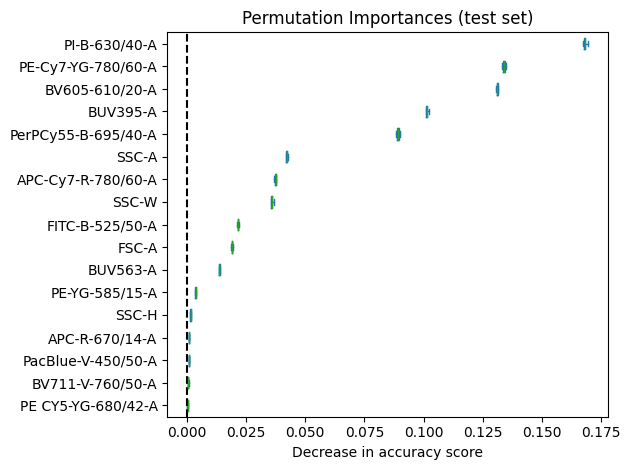

In [ ]:
from sklearn.inspection import permutation_importance


test_results = permutation_importance(
    bestrfF_20, XtestF, ytestF , n_repeats=10, random_state=42, n_jobs=2
)
sorted_importances_idx = test_results.importances_mean.argsort()

test_importances = pd.DataFrame(
    test_results.importances[sorted_importances_idx].T,
    columns=XtrainvalF.columns[sorted_importances_idx],
)


for name, importances in zip(["test"], [test_importances]):
    ax = importances.plot.box(vert=False, whis=10)
    ax.set_title(f"Permutation Importances ({name} set)")
    ax.set_xlabel("Decrease in accuracy score")
    ax.axvline(x=0, color="k", linestyle="--")
    ax.figure.tight_layout()

50 estimators

In [ ]:
from sklearn.ensemble import RandomForestClassifier

bestrfF_50 = RandomForestClassifier(max_depth=11, max_features=12, min_samples_leaf=60, min_samples_split=16, n_estimators=50, random_state=42)
bestrfF_50.fit(XtrainvalF, ytrainvalF) #train this model on the full training set

bestrfF_50.score(XtestF, ytestF) #evaluate on the test data

0.9469472776240749

Model accuracy satisfactory to run PI

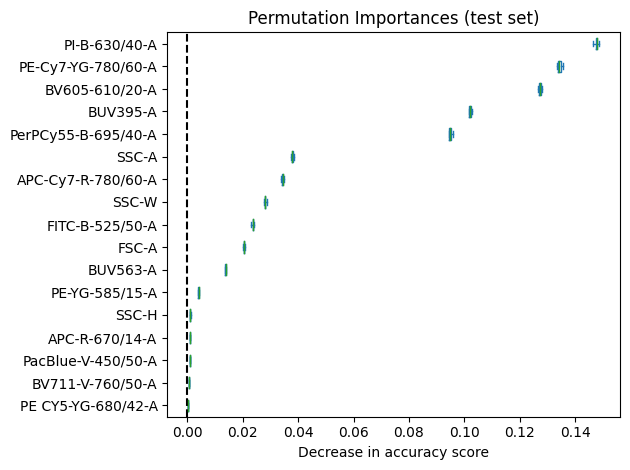

In [ ]:
from sklearn.inspection import permutation_importance


test_results = permutation_importance(
    bestrfF_50, XtestF, ytestF , n_repeats=10, random_state=42, n_jobs=2
)
sorted_importances_idx = test_results.importances_mean.argsort()

test_importances = pd.DataFrame(
    test_results.importances[sorted_importances_idx].T,
    columns=XtrainvalF.columns[sorted_importances_idx],
)


for name, importances in zip(["test"], [test_importances]):
    ax = importances.plot.box(vert=False, whis=10)
    ax.set_title(f"Permutation Importances ({name} set)")
    ax.set_xlabel("Decrease in accuracy score")
    ax.axvline(x=0, color="k", linestyle="--")
    ax.figure.tight_layout()

100 estimators

In [ ]:
bestrfF_100 = RandomForestClassifier(max_depth=11, max_features=12, min_samples_leaf=60, min_samples_split=16, n_estimators=100, random_state=42)
bestrfF_100.fit(XtrainvalF, ytrainvalF) #train this model on the full training set

bestrfF_100.score(XtestF, ytestF) #evaluate on the test data

0.9471216271397962

Model accuracy satisfactory to run PI

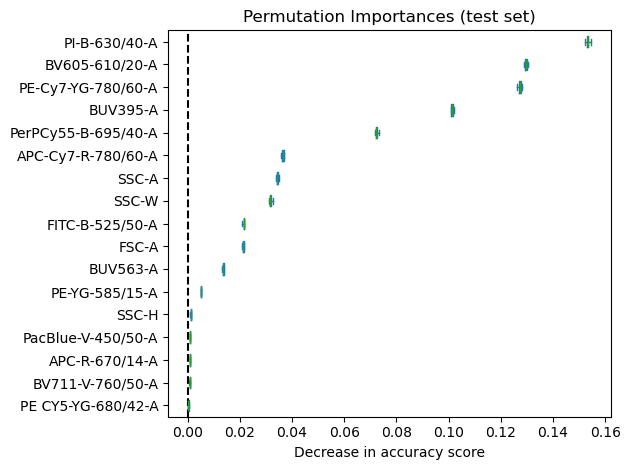

In [ ]:
from sklearn.inspection import permutation_importance


test_results = permutation_importance(
    bestrfF_100, XtestF, ytestF , n_repeats=10, random_state=42, n_jobs=2
)
sorted_importances_idx = test_results.importances_mean.argsort()

test_importances = pd.DataFrame(
    test_results.importances[sorted_importances_idx].T,
    columns=XtrainvalF.columns[sorted_importances_idx],
)


for name, importances in zip(["test"], [test_importances]):
    ax = importances.plot.box(vert=False, whis=10)
    ax.set_title(f"Permutation Importances ({name} set)")
    ax.set_xlabel("Decrease in accuracy score")
    ax.axvline(x=0, color="k", linestyle="--")
    ax.figure.tight_layout()


###Og dataset


Same hyperparameters as the model from randomized search, but with 10 estimators

In [ ]:
bestrfO_10 = RandomForestClassifier(max_depth=11, max_features=12, min_samples_leaf=60, min_samples_split=16, n_estimators=10, random_state=42)
bestrfO_10.fit(XtrainvalO, ytrainvalO) #train this model on the full training set

bestrfO_10.score(XtestO, ytestO) #evaluate on the test data

0.9360687854720972

Model accuracy satisfactory/similar to original model, so we run PI

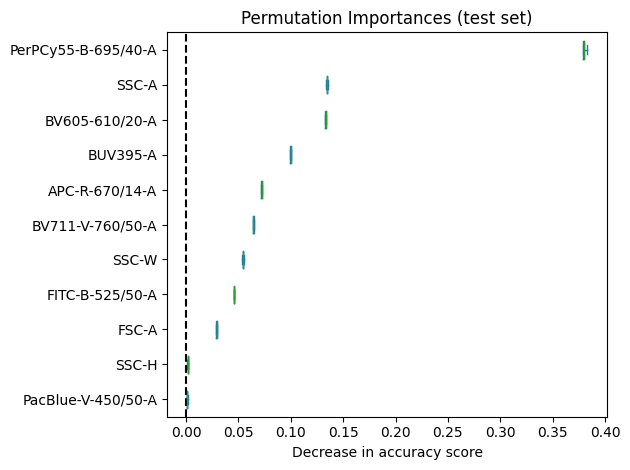

In [ ]:
from sklearn.inspection import permutation_importance


test_results = permutation_importance(
    bestrfO_10, XtestO, ytestO , n_repeats=10, random_state=42, n_jobs=2
)
sorted_importances_idx = test_results.importances_mean.argsort()

test_importances = pd.DataFrame(
    test_results.importances[sorted_importances_idx].T,
    columns=XtrainvalO.columns[sorted_importances_idx],
)


for name, importances in zip(["test"], [test_importances]):
    ax = importances.plot.box(vert=False, whis=10)
    ax.set_title(f"Permutation Importances ({name} set)")
    ax.set_xlabel("Decrease in accuracy score")
    ax.axvline(x=0, color="k", linestyle="--")
    ax.figure.tight_layout()

20 estimators

In [ ]:
bestrfO_20 = RandomForestClassifier(max_depth=11, max_features=12, min_samples_leaf=60, min_samples_split=16, n_estimators=20, random_state=42)
bestrfO_20.fit(XtrainvalO, ytrainvalO) #train this model on the full training set

bestrfO_20.score(XtestO, ytestO) #evaluate on the test data

0.9362936045844746

Model accuracy satisfactory to run PI

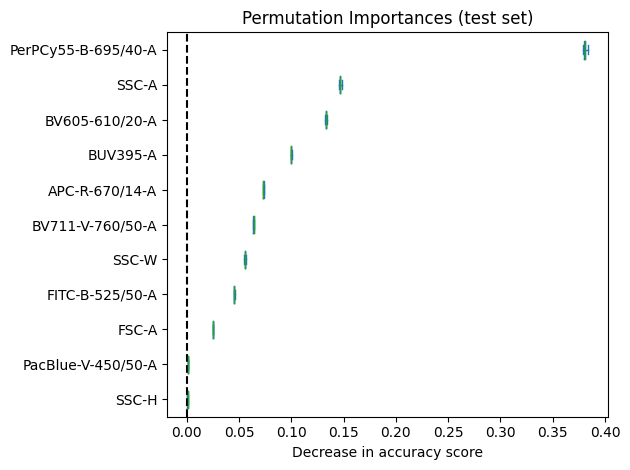

In [ ]:
from sklearn.inspection import permutation_importance


test_results = permutation_importance(
    bestrfO_20, XtestO, ytestO , n_repeats=10, random_state=42, n_jobs=2
)
sorted_importances_idx = test_results.importances_mean.argsort()

test_importances = pd.DataFrame(
    test_results.importances[sorted_importances_idx].T,
    columns=XtrainvalO.columns[sorted_importances_idx],
)


for name, importances in zip(["test"], [test_importances]):
    ax = importances.plot.box(vert=False, whis=10)
    ax.set_title(f"Permutation Importances ({name} set)")
    ax.set_xlabel("Decrease in accuracy score")
    ax.axvline(x=0, color="k", linestyle="--")
    ax.figure.tight_layout()

50 estimators

In [ ]:
bestrfO_50 = RandomForestClassifier(max_depth=11, max_features=12, min_samples_leaf=60, min_samples_split=16, n_estimators=50, random_state=42)
bestrfO_50.fit(XtrainvalO, ytrainvalO) #train this model on the full training set

bestrfO_50.score(XtestO, ytestO) #evaluate on the test data

0.9362844282941735

Model accuracy satisfactory to run PI

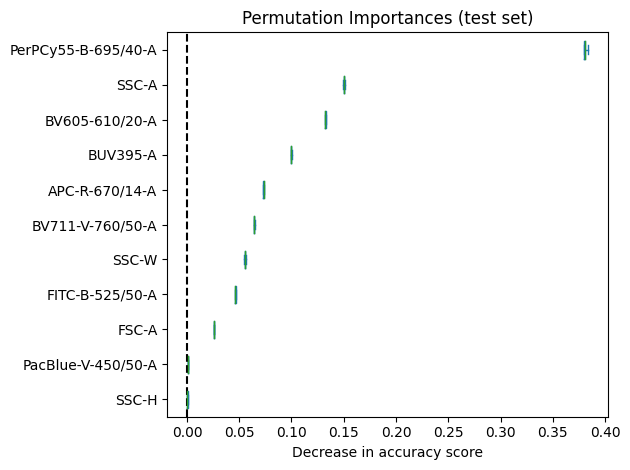

In [ ]:
from sklearn.inspection import permutation_importance


test_results = permutation_importance(
    bestrfO_50, XtestO, ytestO , n_repeats=10, random_state=42, n_jobs=2
)
sorted_importances_idx = test_results.importances_mean.argsort()

test_importances = pd.DataFrame(
    test_results.importances[sorted_importances_idx].T,
    columns=XtrainvalO.columns[sorted_importances_idx],
)


for name, importances in zip(["test"], [test_importances]):
    ax = importances.plot.box(vert=False, whis=10)
    ax.set_title(f"Permutation Importances ({name} set)")
    ax.set_xlabel("Decrease in accuracy score")
    ax.axvline(x=0, color="k", linestyle="--")
    ax.figure.tight_layout()

100 estimators

In [ ]:
bestrfO_100 = RandomForestClassifier(max_depth=11, max_features=12, min_samples_leaf=60, min_samples_split=16, n_estimators=100, random_state=42)
bestrfO_100.fit(XtrainvalO, ytrainvalO) #train this model on the full training set

bestrfO_100.score(XtestO, ytestO) #evaluate on the test data

0.9364220726486903

Model accuracy satisfactory to run PI

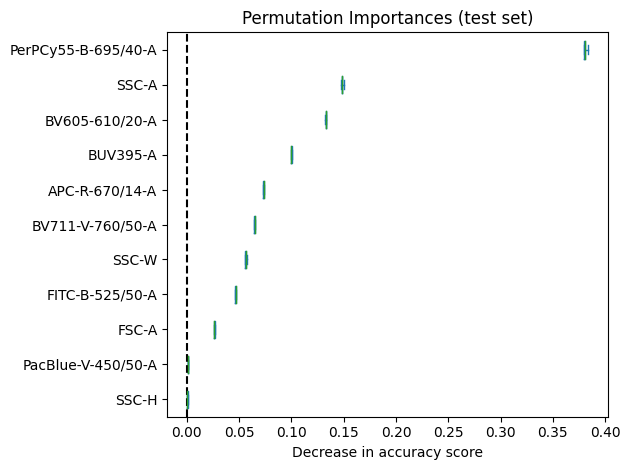

In [ ]:
from sklearn.inspection import permutation_importance


test_results = permutation_importance(
    bestrfO_100, XtestO, ytestO , n_repeats=10, random_state=42, n_jobs=2
)
sorted_importances_idx = test_results.importances_mean.argsort()

test_importances = pd.DataFrame(
    test_results.importances[sorted_importances_idx].T,
    columns=XtrainvalO.columns[sorted_importances_idx],
)


for name, importances in zip(["test"], [test_importances]):
    ax = importances.plot.box(vert=False, whis=10)
    ax.set_title(f"Permutation Importances ({name} set)")
    ax.set_xlabel("Decrease in accuracy score")
    ax.axvline(x=0, color="k", linestyle="--")
    ax.figure.tight_layout()

After plotting the PI of 8 total alternate random forest models changing only the number of estimators and getting similar accuracy, we can see that the PI that we get for the two original models is congruent with these. The features in our dataset are consistent in the way that when they are permuted, or their values are shuffled around, the importance of that particular feature does not ultimately greatly affect the model's performance.

#Refining Og dataset


After further revision of features and their correlations, colinearity, as well as distribution we are removing two more features from the Og dataset and comparing them

In [ ]:
#dropping all same as og plus two more
toDrop = ["SSC-H", "PerPCy55-B-695/40-A", "PE-Cy7-YG-780/60-A", "PE CY5-YG-680/42-A", "PE-YG-585/15-A", "APC-Cy7-R-780/60-A", "BUV563-A"]

ogRefined = theData1.copy() #copy theData dataframe
ogRefined=ogRefined.drop(columns=toDrop) #dropping the unnecessary features
ogRefined

,FSC-A,SSC-A,SSC-W,FITC-B-525/50-A,PI-B-630/40-A,PacBlue-V-450/50-A,BV605-610/20-A,BV711-V-760/50-A,BUV395-A,APC-R-670/14-A
0,88348.805,137055.0,132172.340,922.0,3420.0,-44.720000,23998.3000,6448.28030,7548.86960,658.00
1,42336.800,120825.0,111759.540,406.0,1794.0,28.380001,12288.5400,3054.72000,3441.23000,323.36
2,9516.000,4668.0,71327.130,-5.0,-7.0,-41.280000,93.7400,163.40001,483.06998,-2.82
3,9996.000,65732.0,104517.960,297.0,748.0,496.220000,6378.6200,625.22003,2576.03000,392.92
4,20627.201,90787.0,153326.050,333.0,1161.0,287.240000,9036.0205,3065.04000,4040.69000,1918.54
...,...,...,...,...,...,...,...,...,...,...
1089760,108812.000,103961.0,118014.070,74.0,55.0,194.360000,2857.7800,820.44000,5878.21000,446.50
1089761,46876.000,38296.0,96585.210,30.0,35.0,140.180010,1351.0600,1137.78000,1256.60000,578.10
1089762,69824.805,73155.0,99851.836,95.0,22.0,144.480000,2516.3600,1216.90000,2245.40000,727.56
1089763,56900.800,92426.0,109516.180,46.0,2.0,168.560000,2480.2400,881.50000,2062.06000,657.06


Run the classifier on new dataset

Split the new dataset

In [ ]:
from sklearn.model_selection import train_test_split

#sets for the PCA
XtrainvalOR, XtestOR, ytrainvalOR, ytestOR = train_test_split(ogRefined,labels,test_size=0.2, random_state = 42)
XtrainOR, XvalOR, ytrainOR, yvalOR = train_test_split(XtrainvalOR, ytrainvalOR, test_size = 0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

bestrfOR = RandomForestClassifier(max_depth=11, max_features=12, min_samples_leaf=60, min_samples_split=16, n_estimators=10, random_state=42)
bestrfOR.fit(XtrainvalOR, ytrainvalOR) #train this model on the full training set

RandomForestClassifier(max_depth=11, max_features=12, min_samples_leaf=60,
                       min_samples_split=16, n_estimators=10, random_state=42)

##Model Accuracy score

In [ ]:
bestrfOR.score(XtestOR, ytestOR) #train this model on the full training set

0.9263465058980606

##Running PI on new dataset

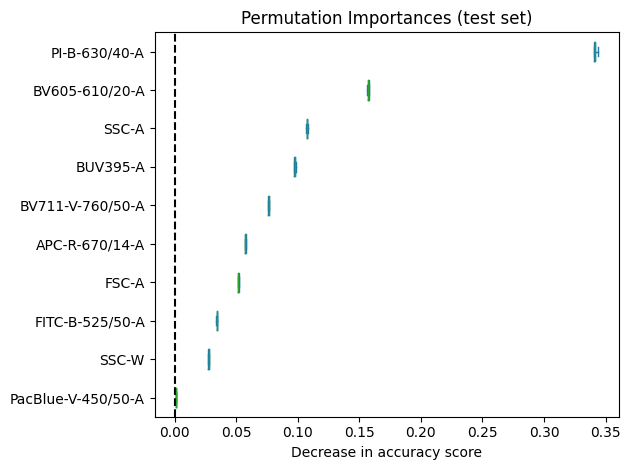

In [ ]:
from sklearn.inspection import permutation_importance


test_results = permutation_importance(
    bestrfOR, XtestOR, ytestOR , n_repeats=10, random_state=42, n_jobs=2
)
sorted_importances_idx = test_results.importances_mean.argsort()

test_importances = pd.DataFrame(
    test_results.importances[sorted_importances_idx].T,
    columns=XtrainvalOR.columns[sorted_importances_idx],
)


for name, importances in zip(["test"], [test_importances]):
    ax = importances.plot.box(vert=False, whis=10)
    ax.set_title(f"Permutation Importances ({name} set)")
    ax.set_xlabel("Decrease in accuracy score")
    ax.axvline(x=0, color="k", linestyle="--")
    ax.figure.tight_layout()

plt.savefig("ogRefinedPI.svg")


#Calculating VIF scores for Og, Og Refined, and Full

Og feature set

In [ ]:
X2 = ogFeatures.iloc[:]
calc_vif(X2)

,variables,VIF
0,FSC-A,9.763961
1,SSC-A,64.811935
2,SSC-H,58.580537
3,SSC-W,6.583101
4,FITC-B-525/50-A,28.344032
5,PerPCy55-B-695/40-A,40.319224
6,PacBlue-V-450/50-A,2.168408
7,BV605-610/20-A,7.602371
8,BV711-V-760/50-A,17.497301
9,BUV395-A,8.036847


Og refined data set

In [ ]:
Z2 = ogRefined.iloc[:]
calc_vif(Z2)

,variables,VIF
0,FSC-A,8.643227
1,SSC-A,18.843774
2,SSC-W,6.400463
3,FITC-B-525/50-A,49.359521
4,PI-B-630/40-A,61.862216
5,PacBlue-V-450/50-A,2.180551
6,BV605-610/20-A,7.758193
7,BV711-V-760/50-A,14.351000
8,BUV395-A,7.922368
9,APC-R-670/14-A,6.928817


Full data set

In [ ]:
Y2 = theData1.iloc[:]
calc_vif(Y2)

,variables,VIF
0,FSC-A,10.274550
1,SSC-A,76.034158
2,SSC-H,62.442573
3,SSC-W,6.667632
4,FITC-B-525/50-A,100.379538
5,PI-B-630/40-A,277.683734
6,PerPCy55-B-695/40-A,161.637719
7,PacBlue-V-450/50-A,2.215255
8,BV605-610/20-A,11.522045
9,BV711-V-760/50-A,47.859424


#Visualizing decision trees

Visualizing the decision trees in Og refined random forest

Function to visualize a tree

In [ ]:
pip install graphviz
pip install matplotlib
#The corrected code for visualizing each tree in a random forest is as follows:
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz

def visualize_tree(tree, feature_names, tree_index):
    dot_data = export_graphviz(
        tree,
        out_file=None,
        feature_names=feature_names,
        filled=True,
        rounded=True,
        special_characters=True
    )
    graph = graphviz.Source(dot_data)
    graph.render(f'tree_{tree_index}')  # Saves the tree as tree_{tree_index}.pdf
    return graph

# Assume `bestrfOR` is your trained RandomForest model and `XtrainvalOR` is your DataFrame
feature_names = XtrainvalOR.columns

# Visualize each tree in the random forest
for i, tree in enumerate(bestrfOR.estimators_):
    graph = visualize_tree(tree, feature_names, i)
    # Display the tree in Jupyter Notebook (optional)
    display(graph)

# Exporting Model


In [ ]:
import joblib
joblib.dump(bestrfOR, 'my_model.pkl', compress=9)

['my_model.pkl']

#Comparing Alternative Models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42, max_iter=500)
log_reg.fit(XtrainOR, ytrainOR)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500, random_state=42)

In [ ]:
log_reg.score(XtestOR, ytestOR)

0.8904442700949288

## Linear SVM Classification Model

In [ ]:
from sklearn.svm import LinearSVC

linearSVC = LinearSVC(C=1.0, random_state=42)
linearSVC.fit(XtrainOR, ytrainOR)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

In [ ]:
linearSVC.score(XtestOR, ytestOR)

0.8625575238698251

##RBF SVM Model

In [ ]:
from sklearn.svm import SVC

# Create an SVM classifier with RBF kernel
rbfSVC = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Train the model on the training data
rbfSVC.fit(XtrainOR, ytrainOR)

SVC(random_state=42)

In [ ]:
rbfSVC.score(XtestOR, ytestOR)

0.8895174647745157

##Single decision tree

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(XtrainOR, ytrainOR)

clf.score(XtestOR, ytestOR)

0.9173675058384148